In [17]:
#Notations : p prime, MesF Mestre test function, fnu inertia degree, lam = lambda

#MesF : Mestre test function. For these algorithms to be correct, MesF must be 
# Complactly supported in [-1,1], even function, positive Fourier transform

Mes(x) = (1-x)*cos(pi*x)+sin(pi*x)/pi


#Algorithms for the sums
#Algorithms for the sums
#Algorithms for the sums
#Algorithms for the sums
#Algorithms for the sums
#Algorithms for the sums

def liste_premier_lambda(lam):                         # Input : lam 
    C = floor(exp(lam))                                # Output : List of primes <= exp(lam)
    return prime_range(C+1)


#Only over Q
def Mestre_somme_premier_lambda(p,lam,MesF):            #Local Mestre sum          
    S,m,x = 0,1,p                                       
    while x<= exp(lam):
        S += (floor(2*sqrt(x)) * x^(-1) * MesF(m*math.log(p)/lam.numerical_approx())).numerical_approx()
        x *= x
        m += 1
    return numerical_approx(log(p)*S)


   
#Only works over Q.    
def Mestre_somme_lambda(lam,MesF):                        # Global Mestre sum 
    Liste = liste_premier_lambda(lam)
    Somme = 0
    for p in Liste:
        Somme += (Mestre_somme_premier_lambda(p,lam,MesF)).numerical_approx()
    return 2*Somme                                        #In the final formula this sum must be multiplied by two

#Only work over Q                                           
def somme_mult_badprimes_lambda(p,lam,MesF):                 # Local sum in the case of p|N i.e multiplicative reduction      
    S = p^(-1)*MesF(math.log(p)/lam.numerical_approx())
    m = 2
    x = p^2
    while x <= exp(lam):
        S= (S + x^(-1)*MesF(m*math.log(p)/lam.numerical_approx())).numerical_approx()
        x= p * x
        m = m+1
    return numerical_approx(log(p)*S)

                                                              #Additive reduciton : the sum is 0 we don't code it


#Only over Q - uses the Wil bound
#input : lambda, MesF,two lists of bad primes : one for multiplicative red and one for additive red



def Mestre_somme_withbadprimes_lambda(lam,MesF,mult_badprimes,add_badprimes): #Global sum with mult and add reductions
    Liste = liste_premier_lambda(lam)                                              
    Somme = 0
    for p in Liste:                                                  
        if p in mult_badprimes :                               #Correct sum for multiplicative red
            Somme += somme_mult_badprimes_lambda(p,lam,MesF)
        elif p in add_badprimes:
            Somme += 0                                         #Do nothing for additive reduction
        else:
            Somme += Mestre_somme_premier_lambda(p,lam,MesF)   # In case of good reduction
    return 2*Somme                                             #factor 2 in the final sum - present in Mestre explicit formula                                                           




#remark : the list we give in input are lists of primes CONTAINED in the set of primes of bad reduction.
#The algorithm stays worect if we forgot some primes of bad reduction, but the result is lee precise 
# that is to say the final bound is lwoer that it would be



#Function defining the integrals terms appearing. Not correct if MesF is not completly supported in [-1,1]
#Integral term algorithm
#Integral term algorithm
#Integral term algorithm
#Integral term algorithm
#Integral term algorithm
#Integral term algorithm
#Integral term algorithm

def Value_Phi_0(MesF):      #The integral term which will be multiplied by the rank. Fourier transform of MesF eval at 0
    return 2*numerical_integral(MesF(x),0,1)[0]


Constant_Mlambda = 2*math.log(2*pi)     #constant appearing in the formula, let's stock it



def Mlambda2(lam,MesF):
    aux(x) = MesF(x) * exp(-lam*x)/(1-exp(-lam*x)) - MesF(0) * exp(-lam*x)/(lam*x)
    a = numerical_integral(aux(x),0,1)[0]
    b = numerical_integral(exp(-x)/x, lam.numerical_approx() , Infinity )[0] #depends on lam, cannot be stocked :(
    return 2*(lam*a - MesF(0)*b) +   MesF(0)*Constant_Mlambda       #still a foctor two at the end, like the sum




#Combining integral terms and the rest
#Combining integral terms and the rest
#Combining integral terms and the rest
#Combining integral terms and the rest
#Combining integral terms and the rest
#Combining integral terms and the rest

#Only over Q
def minorant_conducteur_lambda(lam,MesF,rk):      #Without knowing anything on the conductor
    K = lam * rk * Value_Phi_0(MesF)+Mlambda2(lam,MesF)-Mestre_somme_lambda(lam,MesF)
    return exp(K)

#Only over Q
def minorant_conducteur_lambda_withbadprimes(lam,MesF,rk,mult_badprimes,add_badprimes): #knowing some primes of add and mul reduction
    K = lam * rk *Value_Phi_0(MesF) + Mlambda2(lam,MesF)-Mestre_somme_withbadprimes_lambda(lam,MesF,mult_badprimes,add_badprimes)
    return exp(K)

























#In number fields, without knowing anything about the bad primes, using only the Weil bound
#Algorithm for sums
#Algorithm for sums
#Algorithm for sums
#Algorithm for sums
#Algorithm for sums

def somme_premier_degre_ramifi(p,lam,MesF,fnu):      #Uses the Serre-Weil bound. 
                                                    #Local sums ofver a prime pp avoce p, with inertia degree fnu
    q = p^fnu
    S,m,x = 0,1,q
    while x<= exp(lam):
        S += (floor(2*sqrt(x)) * x^(-1) * MesF(m*math.log(q)/lam.numerical_approx())).numerical_approx()
        x *=  q
        m +=  1
    return numerical_approx(log(q)*S)



def Mestre_somme_lambda_nbfield(lam,MesF,K):        #Combines the local sums previously defined            
    Liste = liste_premier_lambda(lam)
    Somme = 0
    for p in Liste:
        for pp in K.primes_above(p):
            fnu = pp.residue_class_degree()
            Somme += (somme_premier_degre_ramifi(p,lam,MesF,fnu)).numerical_approx()
    return 2 * Somme                                # The usual factor 2 at the end







#With Frobenius

def Somme_Frob(p,fnu,lam,MesF,Frob):            #We get the exact local sums, given a certain Frobenius
    q = p^fnu 
    delt = Frob^2-4*q
    alpha = (Frob-I*sqrt(-delt))/2
    beta = (Frob+I*sqrt(-delt))/2
    a = alpha
    b = beta
    Somme = 0
    m = 1
    x = q
    while x <= exp(lam):
        Somme += (MesF(m*math.log(q)/numerical_approx(lam))*(a+b)/x).numerical_approx()   # compute the sum
        a     *= alpha                                             # powers of roots of Frob increment
        b     *= beta
        x     *= q                                                 # denominator of the sum increment
        m     += 1
    finalSomme = Somme * math.log(q)                           
    return numerical_approx(finalSomme)


def Mini_Somme_Frob(p,fnu,lam,MesF):       #Compare the possible sums in function of the Forbenius. Take the lowest of them
                                            #PS : lowest not in absolute value. This is expected to be a negative number
    bound = floor(2*sqrt(p^fnu))
    MinFrob = - bound
    MinSomme = Somme_Frob(p,fnu,lam,MesF,MinFrob)
    for Frobenius in range(-bound+1,bound+1):
        C = Somme_Frob(p,fnu,lam,MesF,Frobenius)
        if C < MinSomme:
            MinFrob = Frobenius
            MinSomme = C
    return (MinFrob,MinSomme)


def Mestre_Somme_Frob(lam,MesF,K):
    Listeprime = liste_premier_lambda(lam)
    BigSomme = 0
    ListeFrob = []
    for p in Listeprime:
        for prims in K.primes_above(p):
            fnu = prims.residue_class_degree()
            frobenius,value = Mini_Somme_Frob(p,fnu,lam,MesF)
            BigSomme += value.numerical_approx()
            ListeFrob += [(p,fnu,frobenius)]
    return (ListeFrob,2*BigSomme)             #factor 2 in the explicit formulas

def Somme_liste_Frob(lam,MesF,lisfrobs):   #Input: the list of primes considered, with their fnu and attributed frobenius
    Somme = 0
    for k in lisfrobs:
        p,fnu,Frob = k
        Somme += (Somme_Frob(p,fnu,lam,MesF,Frob)).numerical_approx()
    return 2*Somme







def minorant_conducteur_lambda_nbfield(lam,MesF,rk,K):     # Input : K a field. Uses the Serre-Weil bound
    n = K.absolute_degree()
    disc = K.absolute_discriminant()
    lowbound = lam * rk * Value_Phi_0(MesF) + n * Mlambda2(lam,MesF) - Mestre_somme_lambda_nbfield(lam,MesF,K)
    return exp(lowbound)/(disc^2)



def minorant_conducteur_nbfield_Frobenius(lam,MesF,rk,K):   #This calculate the optimal liste of Frobeniuses, d
                                                            #Does not use the Serre-Weil bound ! 
    n = K.absolute_degree()
    discri = K.absolute_discriminant()
    Listefrobs, MestreSomme = Mestre_Somme_Frob(lam,MesF,K)
    lowbound = lam * rk * Value_Phi_0(MesF) + n * Mlambda2(lam,MesF) + MestreSomme
    return Listefrobs , exp(lowbound)/(discri^2)


def minorant_liste_Frob(lam,MesF,rk,K,lisfrobs):        #Where the input is the list of Frobenius traces.
    n = K.absolute_degree()
    discri = K.absolute_discriminant()
    Mestresomme = Somme_liste_Frob(lam,MesF,lisfrobs)
    lowbound = lam * rk * Value_Phi_0(MesF) + n * Mlambda2(lam,MesF) + Mestresomme
    return  exp(lowbound)/(discri^2)
   


In [18]:
# here are the optimization algorithm
#fonction test returns the quare convolu of a0 + a1.cos(2 pi x) + a2.cos(4 pi x) + a3.cos(6 pi x) + m0.Mestre(x)

def fonctiontest(a0,a1,a2,a3,a4): #output convolution square of a0 + a1cos(2pix) + a2cos(4pix) + a3cos(6pix) +a4cos(pix)sur [-1/2,1/2]
    norm=sqrt(a0^2+1/2*(a1^2+a2^2+a3^2+a4^2) +2*(2/pi*a4*(a0+a1/3-a2/15+a3/35)))
    b0,b1,b2,b3,b4=a0/norm,a1/norm,a2/norm,a3/norm,a4/norm
    aux(x)=b0^2*g00(x)+b1^2*g11(x)+b2^2*g22(x)+b3^2*g33(x)+b4^2/2*Mes(x)+2*(b0*b1*g01(x)+b0*b2*g02(x)+b0*b3*g03(x)+b1*b2*g12(x)+b1*b3*g13(x)+b2*b3*g23(x)+b0*b4*gm0(x)+b1*b4*gm1(x)+b2*b4*gm2(x)+b3*b4*gm3(x))
    return aux

g00(x)= -x + 1
g01(x)= 1/2*sin(2*pi*x)/pi
g02(x)= -1/4*sin(4*pi*x)/pi
g03(x)= 1/6*sin(6*pi*x)/pi

g11(x)= 1/8*(2*pi*cos(2*pi*x) - sin(2*pi*x))/pi + 1/8*(2*(pi - 2*pi*x)*cos(2*pi*x) - sin(2*pi*x))/pi 
g12(x)= 1/3*sin(4*pi*x)/pi - 1/6*sin(2*pi*x)/pi
g13(x)= -3/16*sin(6*pi*x)/pi + 1/16*sin(2*pi*x)/pi

g22(x)= 1/16*(4*pi*cos(4*pi*x) - sin(4*pi*x))/pi + 1/16*(4*(pi - 2*pi*x)*cos(4*pi*x) - sin(4*pi*x))/pi
g23(x)= 3/10*sin(6*pi*x)/pi - 1/5*sin(4*pi*x)/pi

g33(x)= 1/24*(6*pi*cos(6*pi*x) - sin(6*pi*x))/pi + 1/24*(6*(pi - 2*pi*x)*cos(6*pi*x) - sin(6*pi*x))/pi

gm0(x) = cos(pi*x)/pi + 1/pi
gm1(x) = (1/6)*(sin(3/2*pi + 2*pi*x) + 3*sin(1/2*pi + 2*pi*x))/pi + 1/3*cos(pi*x)/pi
gm2(x) = (1/30)*(3*sin(5/2*pi + 4*pi*x) + 5*sin(3/2*pi + 4*pi*x))/pi - (1/15)*cos(pi*x)/pi
gm3(x) = (1/70)*(5*sin(7/2*pi + 6*pi*x) + 7*sin(5/2*pi + 6*pi*x))/pi + (1/35)*cos(pi*x)/pi



def optimisitionfonction(lam,rk,K,lisfrobs,a0,a1,a2,a3,m0,pas,nb_iteration): #important condition : a0²+1/2(a1²+a2²+a3²+m0² 
    discri = K.absolute_discriminant()  #Notice I need to know the frobeniuses         + 2/pi(a0b0+a1b0/3 -a2b0/15 +a3b0/35)
    C00 = math.log(discri^2*minorant_liste_Frob(lam,g00,rk,K,lisfrobs))     #coefficient de ma fonction en a0,a1,a2,a3
    C01 = math.log(discri^2*minorant_liste_Frob(lam,g01,rk,K,lisfrobs)) 
    C02 = math.log(discri^2*minorant_liste_Frob(lam,g02,rk,K,lisfrobs)) 
    C03 = math.log(discri^2*minorant_liste_Frob(lam,g03,rk,K,lisfrobs)) 
    C11 = math.log(discri^2*minorant_liste_Frob(lam,g11,rk,K,lisfrobs)) 
    C12 = math.log(discri^2*minorant_liste_Frob(lam,g12,rk,K,lisfrobs)) 
    C13 = math.log(discri^2*minorant_liste_Frob(lam,g13,rk,K,lisfrobs)) 
    C22 = math.log(discri^2*minorant_liste_Frob(lam,g22,rk,K,lisfrobs)) 
    C23 = math.log(discri^2*minorant_liste_Frob(lam,g23,rk,K,lisfrobs)) 
    C33 = math.log(discri^2*minorant_liste_Frob(lam,g33,rk,K,lisfrobs))
    GM0 = math.log(discri^2*minorant_liste_Frob(lam,gm0,rk,K,lisfrobs))
    GM1 = math.log(discri^2*minorant_liste_Frob(lam,gm1,rk,K,lisfrobs))
    GM2 = math.log(discri^2*minorant_liste_Frob(lam,gm2,rk,K,lisfrobs))
    GM3 = math.log(discri^2*minorant_liste_Frob(lam,gm3,rk,K,lisfrobs))
    GG  = math.log(discri^2*minorant_liste_Frob(lam,Mes,rk,K,lisfrobs))
    b0 = a0
    b1 = a1
    b2 = a2
    b3 = a3
    b4 = m0
    for i in range(nb_iteration):
        tempvalue = (b0^2*C00+b1^2*C11+b2^2*C22+b3^2*C33+b4^2/2*GG+2*(b0*b1*C01+b0*b2*C02+b0*b3*C03+b1*b2*C12+b1*b3*C13+b2*b3*C23+b0*b4*GM0 +b1*b4*GM1 +b2*b4*GM2 +b3*b4*GM3)).numerical_approx() 
        gradient0 = ((2*b0*C00+2*b1*C01+2*b2*C02+2*b3*C03+2*b4*GM0) -tempvalue*(2*b0 + 2/pi*b4)).numerical_approx()    #gradient of the function
        gradient1 = ((2*b0*C01+2*b1*C11+2*b2*C12+2*b3*C13+2*b4*GM1)  -tempvalue*(b1  + 2/(3*pi)*b4)).numerical_approx()      
        gradient2 = ((2*b0*C02+2*b1*C12+2*b2*C22+2*b3*C23+2*b4*GM2)  -tempvalue*(b2  - 2/(15*pi)*b4)).numerical_approx()     
        gradient3 = ((2*b0*C03+2*b1*C13+2*b2*C23+2*b3*C33+2*b4*GM3)  -tempvalue*(b3  + 2/(35*pi)*b4)).numerical_approx() 
        gradient4 = ((2*b4*GG+2*b0*GM0+2*b1*GM1+2*b2*GM2+2*b3*GM3)  -tempvalue*(2*b4 + 2/pi*b0 + 2/(3*pi)*b1 - 2/(15*pi)*b2 +2/(35*pi)*b3)).numerical_approx() 
        normgrad = sqrt(gradient0^2+gradient1^2+gradient2^2+gradient3^2+gradient4^2)
        c0=(b0+gradient0*pas/normgrad).numerical_approx()                               # We move the original coordinates in the direction of the gradient 
        c1=(b1+gradient1*pas/normgrad).numerical_approx()                                             
        c2=(b2+gradient2*pas/normgrad).numerical_approx() 
        c3=(b3+gradient3*pas/normgrad).numerical_approx() 
        c4=(b4+gradient4*pas/normgrad).numerical_approx() 
        norm=sqrt(c0^2+1/2*(c1^2+c2^2+c3^2+c4^2) +2*(2/pi*c4*(c0+c1/3-c2/15+c3/35))) #final renormalisation to have F(0)=1                                      
        b0=(c0/norm).numerical_approx()
        b1=(c1/norm).numerical_approx()
        b2=(c2/norm).numerical_approx()
        b3=(c3/norm).numerical_approx()
        b4=(c4/norm).numerical_approx()
    finavalue=b0^2*C00+b1^2*C11+b2^2*C22+b3^2*C33+b4^2/2*GG+2*(b0*b1*C01 + b0*b2*C02 + b0*b3*C03 + b1*b2*C12 + b1*b3*C13 + b2*b3*C23 + b0*b4*GM0 + b1*b4*GM1 + b2*b4*GM2 + b3*b4*GM3 )
    return (b0,b1,b2,b3,b4,(1/discri^2)*exp(finavalue))


# To find the best lambda with 0.01 precision:
def optimi_lam1(MesF,rk,K):
    earlylam = 1
    earlyval = minorant_conducteur_lambda_nbfield(earlylam,MesF,rk,K) 
    while minorant_conducteur_lambda_nbfield(earlylam + 1,MesF,rk,K) > earlyval:
        earlyval = minorant_conducteur_lambda_nbfield(earlylam + 1,MesF,rk,K)
        earlylam = earlylam + 1
    midlam = earlylam-0.9
    midval = minorant_conducteur_lambda_nbfield(midlam,MesF,rk,K)
    while minorant_conducteur_lambda_nbfield(midlam + 0.1,MesF,rk,K) > midval:
        midval = minorant_conducteur_lambda_nbfield(midlam + 0.1,MesF,rk,K)
        midlam = midlam + 0.1
    finlam = midlam-0.09
    finval = minorant_conducteur_lambda_nbfield(finlam,MesF,rk,K)
    while minorant_conducteur_lambda_nbfield(finlam+0.01,MesF,rk,K) > finval:
        finval = minorant_conducteur_lambda_nbfield(finlam+0.01,MesF,rk,K)
        finlam += 0.01
    return (finlam)

def optimi_lam(MesF,rk,K):
    midlam = 1
    midval = minorant_conducteur_nbfield_Frobenius(midlam,MesF,rk,K)[1] 
    while minorant_conducteur_nbfield_Frobenius(midlam + 0.1,MesF,rk,K)[1] > midval:
        midval = minorant_conducteur_nbfield_Frobenius(midlam + 0.1,MesF,rk,K)[1]
        midlam = midlam + 0.1
    finlam = midlam-0.09
    finval = minorant_conducteur_nbfield_Frobenius(finlam,MesF,rk,K)[1]
    while minorant_conducteur_nbfield_Frobenius(finlam+0.01,MesF,rk,K)[1] > finval:
        finval = minorant_conducteur_nbfield_Frobenius(finlam+0.01,MesF,rk,K)[1]
        finlam += 0.01
    return (finlam)
        

In [3]:
f = open("deg 9 fields.sage","r")
deg = 9

def liste_file():
    listeofthefields = []
    for s in f.readlines():
        if s[0] =="[" :
            string_poly =  s.split('[')[2].split(']')[0]
            poly = [ ZZ(n) for n in string_poly.split(", ")]
            listeofthefields += [poly]
    return listeofthefields

poly_fields = liste_file()



ZZx.<x> = ZZ[]
Liste_lambda_discri  = []
Liste_lambda_bounds  = []
Liste_discri_bounds  = []
Liste_field_bounds   = []
for coefficients in poly_fields:
    poly = ZZx(coefficients)
    J.<a> = NumberField(poly)
    rootdisc = float(abs(J.absolute_discriminant())^(1/deg))
    optlam = optimi_lam1(Mes,0,J)
    low_bound = minorant_conducteur_lambda_nbfield(optlam,Mes,0,J)^(1/deg)
    Liste_field_bounds  += [(poly,low_bound)]
    Liste_discri_bounds += [(rootdisc,low_bound)]
    Liste_lambda_bounds += [(optlam,low_bound)]
    Liste_lambda_discri += [(rootdisc,optlam)]
    print(rootdisc)

6.760783648526501
6.774991196916336
6.784382654590378
6.784461671030447
6.786704329211213
6.788735693578008
6.794490845023191
6.798924787991612
6.8101771847288655
6.813299413387335
6.81618572777313
6.8226001071793085
6.822641004182137
6.823289035606977
6.82677001293146
6.830023926536934
6.837225741156747
6.839908726808572
6.84194217969503
6.842832059610451
6.843511334119866
6.844973408840746
6.848061939602067
6.855475915810483
6.858333950961397
6.859579226245458
6.864880287902943
6.867669756729681
6.870032194510172
6.875809667368799
6.877061670895829
6.880792184488981
6.881154851586754
6.881994385964946
6.890797122011223
6.891274359004146
6.891301883842184
6.895271529570493
6.897944025537413
6.903364514047255
6.904614724217287
6.904874096724271
6.905060727881391
6.910387355992344
6.912950124346878
6.91508192889771
6.927043458364812
6.9274926227320455
6.933032038439398
6.934196550406415
6.934638365839785
6.937666816699601
6.940191238433722
6.9479648120809765
6.955735368765998
6.95581477

8.750685599229286
8.752575245142944
8.75361667214153
8.75971701844626
8.762525026676322
8.763687407398095
8.764635728035183
8.764735988131607
8.768603339760215
8.770736281055129
8.771063056941852
8.771199452825892
8.776150345197435
8.776382955329126
8.776742308576626
8.77679885345696
8.779196838461612
8.78088114866803
8.782410100131028
8.782868370622152
8.783173778043299
8.785918628856477
8.786870099644533
8.789415984623632
8.798868390780816
8.802304969792448
8.804643562618635
8.80912630112772
8.810020662781735
8.810318621993547
8.81210468644169
8.816705327953791
8.81722355051604
8.817595977624084
8.817867689568908
8.817889478833385
8.821802917836537
8.8224660866582
8.825448564369097
8.826730303007206
8.826877051365555
8.828681628370855
8.829295585886726
8.83243907846158
8.834517634816692
8.835209618400643
8.83637408529876
8.84054456221323
8.84054456221323
8.849606122193867
8.849965440158513
8.852835790446322
8.857270172598696
8.858554253844549
8.862591501890542
8.864314266337999
8.864

9.469599610975083
9.470052687012492
9.47006301013086
9.470936589988357
9.473606931263728
9.474856442666601
9.475605517226336
9.475668152934023
9.476852923066312
9.477517669469744
9.478618349177381
9.481622515407839
9.482067871078483
9.482119107691226
9.484681316805345
9.484970483062128
9.485960660459149
9.486290535924626
9.48712253032638
9.488356823067019
9.4895020220784
9.489748699673227
9.490241901025568
9.49032408131887
9.491093597701145
9.492376740716935
9.493114829640465
9.493360534978493
9.494363600296397
9.494564111663767
9.497767695425095
9.497778763287949
9.497860423341624
9.498207415922334
9.498268639381266
9.498268639381266
9.499003074750227
9.499512832169163
9.503481448337473
9.504299804555703
9.506873370849853
9.507862032541652
9.509197329876576
9.51227538384756
9.5125716379686
9.512992703401837
9.515770979371469
9.516613065118335
9.518923900800496
9.519168824993226
9.519293126148506
9.520707522059181
9.524186899325816
9.525324487529327
9.526421130974299
9.52968514009984
9

9.876594316175295
9.878243125943035
9.878295255940344
9.878861715557369
9.879055444734636
9.879055444734636
9.879055444734636
9.879264966674146
9.879457708248696
9.879994335577365
9.880902925916489
9.881071022795233
9.881600903597072
9.881600903597072
9.881705033531166
9.881705033531166
9.883343896044357
9.883343896044357
9.884070861091413
9.884361527383176
9.884541738631157
9.885087894094049
9.885520463455123
9.887061125091616
9.887090050558458
9.888713337140818
9.889292422419183
9.890446788593602
9.890592677087081
9.890963432142673
9.891317087371426
9.891996072031468
9.893335860000018
9.893482698434047
9.893617051517758
9.894412028213718
9.895206494252138
9.896103333260283
9.896103333260283
9.896296974311102
9.896974827027265
9.897293213805664
9.897983114001756
9.898555292473095
9.900960929827377
9.90124765345148
9.901390990358141
9.902966601751567
9.904254248303317
9.904875637601434
9.905459225688947
9.905781746683878
9.906254595936929
9.906275787189166
9.90668386610091
9.9073394256

/usr/lib/python3/dist-packages/sage/rings/number_field/number_field_ideal.py:571: RuntimeWarning: cypari2 leaked 13520 bytes on the PARI stack
  hnflist = [ nf.idealhnf(x) for x in self.gens() ]


KeyboardInterrupt: 

In [8]:
A = list_plot(Liste_discri_bounds, color='red')
# x : the root discriminant
# y : the bound

B= list_plot(Liste_lambda_bounds, color='red')
# x : lambda
# y : the bound

C = list_plot(Liste_lambda_discri, color='red')
# x : root discriminant
# y : the optimal lambda for "the" field associated to this root discriminant

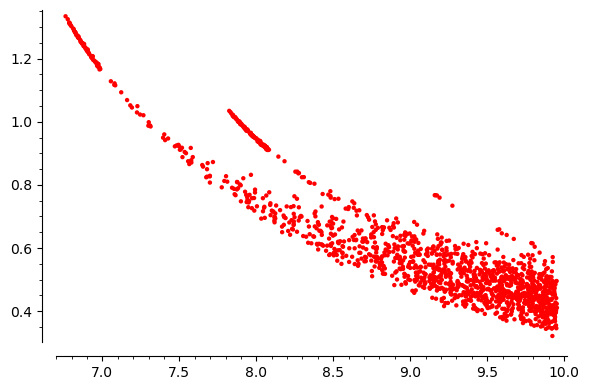

In [9]:
A

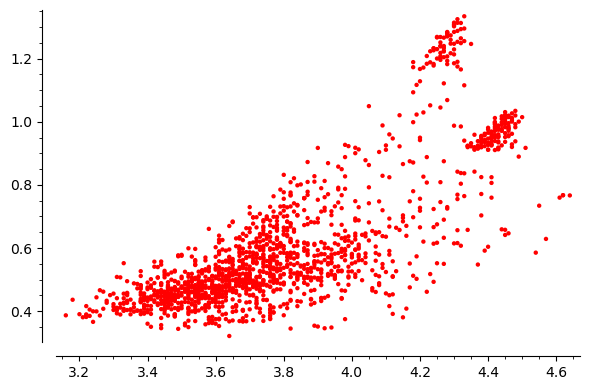

In [11]:
B

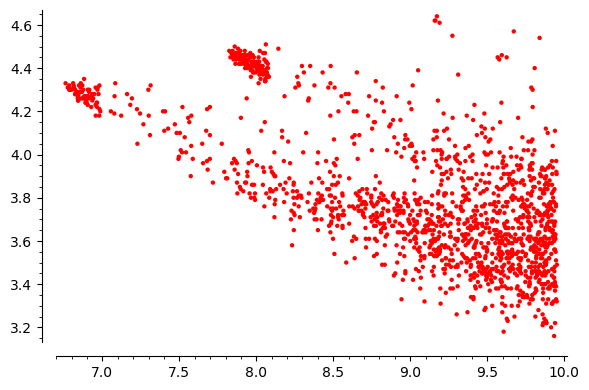

In [12]:
C

In [13]:
Liste_discri_bounds

[(6.760783648526501, 1.33401585833889),
 (6.774991196916336, 1.32478723427649),
 (6.784382654590378, 1.31387613719135),
 (6.784461671030447, 1.31283339912761),
 (6.786704329211213, 1.31328676264871),
 (6.788735693578008, 1.30895025436878),
 (6.794490845023191, 1.30585212640559),
 (6.798924787991612, 1.30218786999854),
 (6.8101771847288655, 1.29528992840371),
 (6.813299413387335, 1.29333101059933),
 (6.81618572777313, 1.28771941139092),
 (6.8226001071793085, 1.28427370521327),
 (6.822641004182137, 1.28443511553407),
 (6.823289035606977, 1.28243498378124),
 (6.82677001293146, 1.28047013952432),
 (6.830023926536934, 1.27464493338062),
 (6.837225741156747, 1.27353842786608),
 (6.839908726808572, 1.26838666073527),
 (6.84194217969503, 1.26866686363593),
 (6.842832059610451, 1.26628649285381),
 (6.843511334119866, 1.26693859506044),
 (6.844973408840746, 1.27016426478572),
 (6.848061939602067, 1.26415942494080),
 (6.855475915810483, 1.25946906796791),
 (6.858333950961397, 1.25315163309546),
 

In [14]:
Liste_field_bounds

[(x^9 - 2*x^8 + 2*x^7 - 3*x^5 + 7*x^4 - 8*x^3 + 6*x^2 - 3*x + 1,
  1.33401585833889),
 (x^9 - 2*x^8 + 2*x^7 - x^5 + x^3 + x^2 - 2*x + 1, 1.32478723427649),
 (x^9 - x^8 - x^7 + 3*x^6 - x^5 - 2*x^4 + x^3 - 1, 1.31387613719135),
 (x^9 - x^7 - x^6 + x^4 - x^3 + x + 1, 1.31283339912761),
 (x^9 - x^8 + x^6 - 3*x^5 + 2*x^4 - 2*x^2 + 2*x - 1, 1.31328676264871),
 (x^9 - x^6 - 2*x^5 - x^4 + 2*x^2 + x + 1, 1.30895025436878),
 (x^9 - 3*x^8 + 5*x^7 - 5*x^6 + 5*x^5 - 5*x^4 + 5*x^3 - 4*x^2 + 3*x - 1,
  1.30585212640559),
 (x^9 - 2*x^8 + 3*x^7 - 3*x^6 + 2*x^5 - 2*x^4 + 3*x^3 - 3*x^2 + 3*x - 1,
  1.30218786999854),
 (x^9 - x^8 - x^7 + 3*x^6 - x^5 - 2*x^4 + 2*x^3 - x + 1, 1.29528992840371),
 (x^9 - x^8 - 2*x^7 + 3*x^6 + x^5 - 2*x^4 + 1, 1.29333101059933),
 (x^9 - 3*x^5 + 2*x - 1, 1.28771941139092),
 (x^9 - 2*x^8 + 3*x^6 - x^5 - 3*x^4 + 3*x^3 + x^2 - 2*x + 1, 1.28427370521327),
 (x^9 - 2*x^8 + 2*x^7 - 3*x^6 + 4*x^5 - 5*x^4 + 5*x^3 - 5*x^2 + 3*x - 1,
  1.28443511553407),
 (x^9 - 2*x^8 + 3*x^7 - 3*x^6 + x^

In [15]:
Liste_lambda_bounds

[(4.33000000000000, 1.33401585833889),
 (4.31000000000000, 1.32478723427649),
 (4.30000000000000, 1.31387613719135),
 (4.32000000000000, 1.31283339912761),
 (4.31000000000000, 1.31328676264871),
 (4.30000000000000, 1.30895025436878),
 (4.30000000000000, 1.30585212640559),
 (4.30000000000000, 1.30218786999854),
 (4.33000000000000, 1.29528992840371),
 (4.32000000000000, 1.29333101059933),
 (4.31000000000000, 1.28771941139092),
 (4.28000000000000, 1.28427370521327),
 (4.30000000000000, 1.28443511553407),
 (4.28000000000000, 1.28243498378124),
 (4.28000000000000, 1.28047013952432),
 (4.28000000000000, 1.27464493338062),
 (4.29000000000000, 1.27353842786608),
 (4.26000000000000, 1.26838666073527),
 (4.25000000000000, 1.26866686363593),
 (4.27000000000000, 1.26628649285381),
 (4.25000000000000, 1.26693859506044),
 (4.28000000000000, 1.27016426478572),
 (4.32000000000000, 1.26415942494080),
 (4.29000000000000, 1.25946906796791),
 (4.31000000000000, 1.25315163309546),
 (4.33000000000000, 1.255

In [16]:
Liste_lambda_discri

[(6.760783648526501, 4.33000000000000),
 (6.774991196916336, 4.31000000000000),
 (6.784382654590378, 4.30000000000000),
 (6.784461671030447, 4.32000000000000),
 (6.786704329211213, 4.31000000000000),
 (6.788735693578008, 4.30000000000000),
 (6.794490845023191, 4.30000000000000),
 (6.798924787991612, 4.30000000000000),
 (6.8101771847288655, 4.33000000000000),
 (6.813299413387335, 4.32000000000000),
 (6.81618572777313, 4.31000000000000),
 (6.8226001071793085, 4.28000000000000),
 (6.822641004182137, 4.30000000000000),
 (6.823289035606977, 4.28000000000000),
 (6.82677001293146, 4.28000000000000),
 (6.830023926536934, 4.28000000000000),
 (6.837225741156747, 4.29000000000000),
 (6.839908726808572, 4.26000000000000),
 (6.84194217969503, 4.25000000000000),
 (6.842832059610451, 4.27000000000000),
 (6.843511334119866, 4.25000000000000),
 (6.844973408840746, 4.28000000000000),
 (6.848061939602067, 4.32000000000000),
 (6.855475915810483, 4.29000000000000),
 (6.858333950961397, 4.31000000000000),
 

In [2]:
mylisteis = [(6.760783648526501, 1.33401585833889),
 (6.774991196916336, 1.32478723427649),
 (6.784382654590378, 1.31387613719135),
 (6.784461671030447, 1.31283339912761),
 (6.786704329211213, 1.31328676264871),
 (6.788735693578008, 1.30895025436878),
 (6.794490845023191, 1.30585212640559),
 (6.798924787991612, 1.30218786999854),
 (6.8101771847288655, 1.29528992840371),
 (6.813299413387335, 1.29333101059933),
 (6.81618572777313, 1.28771941139092),
 (6.8226001071793085, 1.28427370521327),
 (6.822641004182137, 1.28443511553407),
 (6.823289035606977, 1.28243498378124),
 (6.82677001293146, 1.28047013952432),
 (6.830023926536934, 1.27464493338062),
 (6.837225741156747, 1.27353842786608),
 (6.839908726808572, 1.26838666073527),
 (6.84194217969503, 1.26866686363593),
 (6.842832059610451, 1.26628649285381),
 (6.843511334119866, 1.26693859506044),
 (6.844973408840746, 1.27016426478572),
 (6.848061939602067, 1.26415942494080),
 (6.855475915810483, 1.25946906796791),
 (6.858333950961397, 1.25315163309546),
 (6.859579226245458, 1.25548868832768),
 (6.864880287902943, 1.25117852404877),
 (6.867669756729681, 1.24733254764018),
 (6.870032194510172, 1.24896392316641),
 (6.875809667368799, 1.24691610495040),
 (6.877061670895829, 1.24037396002067),
 (6.880792184488981, 1.23852768500092),
 (6.881154851586754, 1.24640177474930),
 (6.881994385964946, 1.23988423880979),
 (6.890797122011223, 1.23276230612224),
 (6.891274359004146, 1.23360060709306),
 (6.891301883842184, 1.23226320746518),
 (6.895271529570493, 1.22991881914125),
 (6.897944025537413, 1.22627257485931),
 (6.903364514047255, 1.22251678299834),
 (6.904614724217287, 1.22320088353479),
 (6.904874096724271, 1.22912302426515),
 (6.905060727881391, 1.22504243699773),
 (6.910387355992344, 1.21815493436443),
 (6.912950124346878, 1.21700566036831),
 (6.91508192889771, 1.21332182530966),
 (6.927043458364812, 1.20439503058770),
 (6.9274926227320455, 1.20821081201610),
 (6.933032038439398, 1.20296974235628),
 (6.934196550406415, 1.20692904472627),
 (6.934638365839785, 1.20028803680589),
 (6.937666816699601, 1.20748993716185),
 (6.940191238433722, 1.19582233346193),
 (6.9479648120809765, 1.19301417085106),
 (6.955735368765998, 1.18826893422177),
 (6.95581477158766, 1.18980797878985),
 (6.9566566117883015, 1.18881285753375),
 (6.96403052658057, 1.18299303676288),
 (6.965087641719862, 1.18359912132638),
 (6.9655387287831525, 1.17796629114356),
 (6.96772586811972, 1.18516550047698),
 (6.9698831896865885, 1.17485988993554),
 (6.974862940277724, 1.18244193212232),
 (6.979829400188711, 1.17276293351334),
 (6.981088629714534, 1.16572589391938),
 (6.9811965556890705, 1.17159760860500),
 (6.986434665333371, 1.16704850248150),
 (7.055069190726844, 1.12818765072429),
 (7.077473690573112, 1.11669186329365),
 (7.079252660649143, 1.12156532336106),
 (7.083674829455885, 1.11535550667367),
 (7.122270173949839, 1.09321264139855),
 (7.160440532505348, 1.06863365390470),
 (7.181322707761967, 1.05189009477948),
 (7.191962141398573, 1.04506896193276),
 (7.224729753189014, 1.02944652073473),
 (7.227513950277386, 1.04935687269531),
 (7.244778205967161, 1.02278783813111),
 (7.266601675234943, 1.02054887971119),
 (7.298720405089605, 0.987440499231532),
 (7.301167627524116, 0.998527518414520),
 (7.309329528391388, 0.988262991956294),
 (7.313374522932513, 0.984986784019733),
 (7.394280534661294, 0.949474804325333),
 (7.402113677100906, 0.959936291349459),
 (7.407498030458523, 0.941772215729693),
 (7.4269771985119375, 0.947009069723396),
 (7.470901115819488, 0.922032924126840),
 (7.482401020594751, 0.925000209360815),
 (7.494235316579902, 0.926788115437817),
 (7.49727167313441, 0.922706429831142),
 (7.5035043093574965, 0.911176911557420),
 (7.509114412866898, 0.912390350588864),
 (7.517104167675695, 0.917594483412977),
 (7.520281139778632, 0.887963349005155),
 (7.534853935779251, 0.904228144520931),
 (7.543256816566784, 0.900376244384347),
 (7.557083165637338, 0.874821320599188),
 (7.564677893564327, 0.865913187791387),
 (7.57421114183088, 0.917055281469888),
 (7.57720180132948, 0.878082651411599),
 (7.578196592851195, 0.870834696154072),
 (7.5872261452061895, 0.888028173785416),
 (7.648845334931678, 0.862896474758301),
 (7.654047847651406, 0.857768021970536),
 (7.674669528767377, 0.824091800680891),
 (7.679939163455959, 0.849674079798418),
 (7.680385885827834, 0.826008150245795),
 (7.6839522023270215, 0.868876463126257),
 (7.69812995541319, 0.826880742600248),
 (7.69852493609538, 0.807318343011336),
 (7.69852493609538, 0.828818428232266),
 (7.718314336537879, 0.872405676560295),
 (7.775570800208219, 0.792260407406451),
 (7.7921233914709545, 0.812449721087704),
 (7.803495883803438, 0.827487258071360),
 (7.811329690166178, 0.810192989060426),
 (7.824119572877918, 1.03447873772849),
 (7.831780876539563, 1.03054618225488),
 (7.8371916138637125, 1.02652519944255),
 (7.842429715201592, 0.790957712224142),
 (7.846184582522963, 1.01985204171587),
 (7.8483330109494345, 1.01919561172100),
 (7.8484382251601605, 1.02179153887658),
 (7.852360077620552, 1.01727243337670),
 (7.852437190390446, 1.01597236926402),
 (7.855195442316715, 0.787489452912358),
 (7.8556593144839795, 1.01549833009310),
 (7.8592902357039245, 0.770452106849641),
 (7.8598472963764925, 1.01446845194453),
 (7.862348608567159, 1.01472301012952),
 (7.864123905179495, 1.01176088391941),
 (7.865215997996453, 0.767344718156045),
 (7.865865006581763, 1.01169342408503),
 (7.869048486508455, 1.00917483957240),
 (7.872799352742788, 1.00759550448370),
 (7.873672197468071, 0.785645818883690),
 (7.8747410708211545, 0.809282951443085),
 (7.877025666077354, 0.808453224670314),
 (7.877525871397466, 1.00495408551240),
 (7.881006937941629, 1.00039297787995),
 (7.881693312094447, 0.789400052660982),
 (7.888177080559102, 0.998383696624859),
 (7.88892572006585, 1.00043190906311),
 (7.888996760904875, 1.00126676888430),
 (7.889563956033351, 0.997942181026218),
 (7.892238156423569, 0.998928095600217),
 (7.893466775303929, 0.801419377147258),
 (7.894261852578233, 0.995654219346128),
 (7.895792175132678, 0.992323901875042),
 (7.898970584189897, 0.798581223161681),
 (7.89923921821277, 0.991820553567155),
 (7.899503924885697, 0.993340892281546),
 (7.8999824007054595, 0.747861292353361),
 (7.902226077812686, 0.994014003601753),
 (7.906940001997266, 0.989721337514024),
 (7.911735716556478, 0.987880246063904),
 (7.912077668590721, 0.986562792173448),
 (7.915599928124479, 0.820950203545340),
 (7.917900460070506, 0.982728995163387),
 (7.921755121330031, 0.980852206027008),
 (7.922319695291741, 0.984373691565114),
 (7.9249470606033645, 0.982551010128715),
 (7.925628120976265, 0.978953871993338),
 (7.927047447439632, 0.980798258012805),
 (7.927111026501426, 0.778298118750295),
 (7.927336677144769, 0.978857657312397),
 (7.927568501571171, 0.976897951201873),
 (7.9297267991941345, 0.978319091995066),
 (7.929978869764872, 0.977501579964501),
 (7.93436724108941, 0.768109330865690),
 (7.93476888671115, 0.971696868038078),
 (7.936200135009762, 0.974573826610071),
 (7.937407489217685, 0.745536350120341),
 (7.940779242019192, 0.971051411154923),
 (7.94088695245118, 0.761027355238081),
 (7.942529693222724, 0.975491364294138),
 (7.942595570842184, 0.752806264587228),
 (7.944738662802955, 0.971323611410334),
 (7.945301668392245, 0.971627438484432),
 (7.948043476254883, 0.729230189322877),
 (7.948168428450956, 0.969022168867978),
 (7.950078762436597, 0.744282997986677),
 (7.952786009534496, 0.748438140623564),
 (7.956176861441781, 0.768508021863176),
 (7.960532269609265, 0.963716610816606),
 (7.9611733863200405, 0.961773363204505),
 (7.962138167334573, 0.964180822595900),
 (7.96333454396728, 0.960284984667649),
 (7.964054327756456, 0.964981290853467),
 (7.964097168699651, 0.962018881512337),
 (7.964127375948746, 0.963079062948745),
 (7.965212046198332, 0.831823869767024),
 (7.965378907592252, 0.958786153655158),
 (7.967055869678788, 0.959984897746286),
 (7.971201512922811, 0.726187673560180),
 (7.971462322426181, 0.957498107963914),
 (7.9719476705544245, 0.757743142423386),
 (7.973384287581461, 0.957128591508849),
 (7.975135621542197, 0.956996408787571),
 (7.975280639749653, 0.954477335712604),
 (7.975306708201654, 0.954128250535055),
 (7.979291635966823, 0.955229889021243),
 (7.980843543671649, 0.954113430797042),
 (7.982930114847562, 0.953371932029269),
 (7.983610092516636, 0.951996723347438),
 (7.983648358130557, 0.951842551069001),
 (7.983999466172356, 0.951626469134521),
 (7.984230078632112, 0.951436893667444),
 (7.985493100963282, 0.758340830353465),
 (7.985656279889994, 0.951506030949968),
 (7.986999681029561, 0.718512517734920),
 (7.989303401342973, 0.950428366568306),
 (7.989678034814701, 0.950213110979979),
 (7.99156075864565, 0.775864264796241),
 (7.991885754257511, 0.785036983345890),
 (7.996776629218132, 0.947077928696333),
 (7.998306689215172, 0.947226990696348),
 (8.00173459930962, 0.946620900382084),
 (8.004157928544043, 0.732141070451640),
 (8.007760089723373, 0.937832828455213),
 (8.009865061761394, 0.942154137365061),
 (8.011781504229095, 0.938929747283892),
 (8.014271927495393, 0.937345472594543),
 (8.0148678715911, 0.936277461804940),
 (8.01496636951823, 0.940188458818464),
 (8.018583564096746, 0.934443818499561),
 (8.020193463786644, 0.940016702077493),
 (8.020272800625344, 0.938570936695624),
 (8.022571619343728, 0.937937225413853),
 (8.024922184852914, 0.935537492441872),
 (8.025917973668896, 0.938654742019293),
 (8.026419677495623, 0.933935994797094),
 (8.027128835166577, 0.928990700471868),
 (8.027678870564865, 0.931968152215397),
 (8.02871813711456, 0.932922780536842),
 (8.031022106101101, 0.926902918518625),
 (8.032167787923926, 0.693183752226158),
 (8.035992294467576, 0.926723167379938),
 (8.04139406443249, 0.924732603650300),
 (8.042880424217776, 0.757802159704742),
 (8.043057231862413, 0.924737318132658),
 (8.043575033495273, 0.716383279989121),
 (8.044294560501827, 0.928292462763322),
 (8.049955652267693, 0.921558032185725),
 (8.050571487504062, 0.727540784341369),
 (8.052304141153627, 0.925092071682990),
 (8.052408626855879, 0.730590069658412),
 (8.05405152670822, 0.923030209300839),
 (8.054191734755818, 0.922644706936868),
 (8.055158064289696, 0.695558138634622),
 (8.056469223872242, 0.919980071954128),
 (8.056469223872242, 0.923800131275620),
 (8.057997795344034, 0.923537493890402),
 (8.05861699100891, 0.922040662803195),
 (8.059171324558104, 0.919437747038105),
 (8.061485237065735, 0.915767136460034),
 (8.061902162893553, 0.917159486971712),
 (8.063687242819487, 0.918230759156012),
 (8.064094858750531, 0.919536446035682),
 (8.064873501694677, 0.766302156035956),
 (8.065371227333689, 0.912591890351980),
 (8.06833161931649, 0.919486899169351),
 (8.068936487390792, 0.918979957810644),
 (8.070766151230238, 0.911666896071979),
 (8.072870647200185, 0.914634738412066),
 (8.074218246316182, 0.914496680134919),
 (8.074493778509293, 0.910387302619181),
 (8.075532547136826, 0.911182097856792),
 (8.082396130834654, 0.911352075912231),
 (8.084028024477323, 0.776543920876828),
 (8.090234766474229, 0.736470332717736),
 (8.091706963250102, 0.741644962509515),
 (8.092883179779871, 0.704043697894998),
 (8.100787079462586, 0.718494189832032),
 (8.106602296137993, 0.715510517589183),
 (8.111230559316533, 0.715503732141852),
 (8.117273270389179, 0.687020799034970),
 (8.117838574901954, 0.696677781028331),
 (8.118722326633202, 0.681373378037942),
 (8.119565821184501, 0.698905891425345),
 (8.123280207541782, 0.693721815401880),
 (8.123280207541782, 0.709687161908855),
 (8.12896825001009, 0.734647342720234),
 (8.143489654014298, 0.889542027287949),
 (8.154454551798763, 0.720006230011513),
 (8.167171135047115, 0.667851517652886),
 (8.167839766947068, 0.650189659141421),
 (8.177182059428267, 0.702941239151092),
 (8.17904913321009, 0.673522800778082),
 (8.18096276506779, 0.697989511564952),
 (8.183404054774442, 0.874879362822603),
 (8.19006002814473, 0.694852745385595),
 (8.197484316900852, 0.731710273907527),
 (8.207014552842281, 0.654089127495771),
 (8.214605745924514, 0.680996939172454),
 (8.21954902589141, 0.642064026742463),
 (8.225031804994805, 0.729550682254517),
 (8.228850525752568, 0.688224690288772),
 (8.232478096926675, 0.660674003457708),
 (8.237813718918645, 0.658731146670457),
 (8.241959118616057, 0.732673113868722),
 (8.242393153668534, 0.672659291080550),
 (8.243201992132938, 0.708383887928762),
 (8.243408047150965, 0.675502593587462),
 (8.243822867144058, 0.684003157830624),
 (8.247540282865833, 0.763892361589358),
 (8.248530664244292, 0.697504658192615),
 (8.253730809012508, 0.841857862044612),
 (8.26424479675389, 0.755998550287942),
 (8.264493295024062, 0.651533358797672),
 (8.266107078475075, 0.841979045183686),
 (8.273030096820111, 0.836628317089538),
 (8.275368485489462, 0.687061166648808),
 (8.276351490858795, 0.728929595544073),
 (8.277107711304113, 0.837540867322930),
 (8.282962463379436, 0.697438162874005),
 (8.289355446336325, 0.701618444984587),
 (8.293887819141846, 0.699737534542163),
 (8.296531620903911, 0.824215036551645),
 (8.30463415329471, 0.637909437353337),
 (8.309111472191717, 0.824559594622660),
 (8.323867477640045, 0.635815103073449),
 (8.332758784012663, 0.685650567151027),
 (8.3369272995227, 0.616688142109914),
 (8.341196389734408, 0.808527878012964),
 (8.341792597212393, 0.668056085517983),
 (8.346854272278867, 0.643773056863896),
 (8.350216073818244, 0.806268275685281),
 (8.357733190849205, 0.614976111322448),
 (8.370287218998698, 0.637155186268149),
 (8.375380553691238, 0.635748503571703),
 (8.377718728240055, 0.803683985809385),
 (8.378785579820065, 0.709444307468513),
 (8.380060200558196, 0.668367179483285),
 (8.384054753566128, 0.700218846929548),
 (8.384497654267244, 0.715674411213696),
 (8.391778629827009, 0.662362790476460),
 (8.393975043408858, 0.613072468871204),
 (8.397029030972833, 0.610510348094909),
 (8.400238140878006, 0.681887133029433),
 (8.401839025184, 0.595374015272781),
 (8.40293258817732, 0.676394865753787),
 (8.406841161794711, 0.673619625225590),
 (8.407688148028535, 0.613274664281251),
 (8.409655006289434, 0.654753727454962),
 (8.417837174698247, 0.654231669044659),
 (8.422972265489944, 0.611595231541062),
 (8.423612394123296, 0.650313348416482),
 (8.424465294065184, 0.731444236848302),
 (8.425743350172226, 0.641541844442665),
 (8.42868757014696, 0.610141076897421),
 (8.43094604530065, 0.771113366539696),
 (8.434013134936936, 0.607265508877834),
 (8.453268226957858, 0.591306991682219),
 (8.460296328208644, 0.607480388244023),
 (8.460935997411188, 0.671686360843934),
 (8.467789577669118, 0.768909237131985),
 (8.472840600186135, 0.629872984218374),
 (8.473465146387559, 0.577759940798757),
 (8.476854003522291, 0.683535826091643),
 (8.478931352209079, 0.580393939297134),
 (8.481003798681629, 0.779903849880691),
 (8.481508761617636, 0.669707606711863),
 (8.481752835566088, 0.764475405912614),
 (8.48322383888405, 0.759555266753159),
 (8.483324639443078, 0.611896332078981),
 (8.484734842149456, 0.645215818877976),
 (8.485137413036027, 0.606511652128026),
 (8.48579126501694, 0.683694288207781),
 (8.488151834604176, 0.662827040477203),
 (8.49235768925182, 0.698335900189525),
 (8.49235768925182, 0.664172066418645),
 (8.492957167446216, 0.615069400673160),
 (8.498087602665988, 0.694303030559454),
 (8.49858571623943, 0.639237424340620),
 (8.499060717286946, 0.677240276947535),
 (8.503428737679846, 0.576746836929583),
 (8.50355007577301, 0.584015302992168),
 (8.504499249617172, 0.584127521026404),
 (8.50744115345664, 0.597192376377343),
 (8.508737449473937, 0.754959769092248),
 (8.511375167677636, 0.642894357266273),
 (8.513728612282936, 0.581897130183181),
 (8.516426156218785, 0.591137263789040),
 (8.519004912694085, 0.692280387748047),
 (8.522628009331408, 0.577960885404554),
 (8.525952572592194, 0.559763185846584),
 (8.530251574366183, 0.592783302355370),
 (8.531215580841742, 0.619800792038467),
 (8.531600939554696, 0.617609178442644),
 (8.533704171469878, 0.756069763964004),
 (8.535446888376736, 0.615115035639997),
 (8.538130827153967, 0.658936670411743),
 (8.541762553614747, 0.593357639678597),
 (8.545001555049732, 0.621422918982441),
 (8.553107493865769, 0.549844440478171),
 (8.556543689108652, 0.665205253998367),
 (8.558799679262124, 0.585457503686918),
 (8.560347917467132, 0.605835160481942),
 (8.560347917467132, 0.583852233724767),
 (8.560478615269808, 0.570845393918273),
 (8.56367140066214, 0.604004288434099),
 (8.56609897141514, 0.683768269321503),
 (8.56989772714389, 0.620746276023525),
 (8.58049352464562, 0.724920530958299),
 (8.58440760409858, 0.575401739209965),
 (8.59725768228574, 0.723520153687610),
 (8.600875280690277, 0.729583869343116),
 (8.602949900738809, 0.555860542902349),
 (8.603310295990402, 0.624958568749667),
 (8.60403072437132, 0.599234549546974),
 (8.622685006223126, 0.572267726680211),
 (8.623984545580903, 0.747665455354335),
 (8.625775314308134, 0.635376733077384),
 (8.633073145334544, 0.727436553889189),
 (8.634211720911441, 0.625396534145451),
 (8.636462537589166, 0.741767083134289),
 (8.638448916694408, 0.641096598377123),
 (8.639102671102481, 0.599097420821704),
 (8.63948955038969, 0.549197577863129),
 (8.64678723961742, 0.624791853540231),
 (8.649008110515066, 0.626345115424295),
 (8.650909200941706, 0.718064655732493),
 (8.653497421844449, 0.703244438588275),
 (8.658790367217557, 0.655378294387443),
 (8.658831434607995, 0.561096669041610),
 (8.660842062111671, 0.543626964245991),
 (8.664540996893768, 0.549862830393227),
 (8.668701097869441, 0.646115246780526),
 (8.669265803217975, 0.719616864453378),
 (8.669349193454996, 0.584862479031521),
 (8.671042632868696, 0.605379898306795),
 (8.676107135955382, 0.584725923316725),
 (8.683136998147184, 0.655634214827770),
 (8.683546642886448, 0.566434003484502),
 (8.688998828639074, 0.620447497170309),
 (8.692654228076428, 0.630139920696869),
 (8.693483288277497, 0.601428663787499),
 (8.69398042095861, 0.619930605973272),
 (8.702397077337, 0.557877037069333),
 (8.705352178577638, 0.628166123721993),
 (8.70649922068627, 0.572024776833032),
 (8.708878372058528, 0.629505990534322),
 (8.709447769465218, 0.630460041311304),
 (8.71127918256141, 0.558237075961850),
 (8.71286785118944, 0.569888021975714),
 (8.714332260533013, 0.596299500475205),
 (8.7180657209142, 0.704427769212355),
 (8.720588472121015, 0.618576741026775),
 (8.726218510120216, 0.697452879525655),
 (8.732952936427427, 0.689689520135050),
 (8.733032858389763, 0.580341428658245),
 (8.742739711695373, 0.576939782378744),
 (8.746535286485848, 0.633327914909415),
 (8.746850990323617, 0.643103361944138),
 (8.74717996015023, 0.560096192755660),
 (8.74930831909763, 0.638500197025589),
 (8.750685599229286, 0.527100504675685),
 (8.752575245142944, 0.510618190324048),
 (8.75361667214153, 0.666593362717487),
 (8.75971701844626, 0.602545194331233),
 (8.762525026676322, 0.650189861180341),
 (8.763687407398095, 0.703463307436992),
 (8.764635728035183, 0.634325895937350),
 (8.764735988131607, 0.572870960176280),
 (8.768603339760215, 0.541482484150706),
 (8.770736281055129, 0.617466738542255),
 (8.771063056941852, 0.684290670367975),
 (8.771199452825892, 0.571544078298110),
 (8.776150345197435, 0.657435530040251),
 (8.776382955329126, 0.675053472544786),
 (8.776742308576626, 0.596994012272217),
 (8.77679885345696, 0.557505380377293),
 (8.779196838461612, 0.585575500844060),
 (8.78088114866803, 0.561966427057887),
 (8.782410100131028, 0.597257744215955),
 (8.782868370622152, 0.557372294391396),
 (8.783173778043299, 0.602573442533036),
 (8.785918628856477, 0.571240098362055),
 (8.786870099644533, 0.566927722089082),
 (8.789415984623632, 0.663938604025959),
 (8.798868390780816, 0.537239836353725),
 (8.802304969792448, 0.549762025570763),
 (8.804643562618635, 0.545909998126082),
 (8.80912630112772, 0.550815523038915),
 (8.810020662781735, 0.555006510315155),
 (8.810318621993547, 0.565221376358632),
 (8.81210468644169, 0.569313444549656),
 (8.816705327953791, 0.554211792146139),
 (8.81722355051604, 0.666153542073424),
 (8.817595977624084, 0.573741131740652),
 (8.817867689568908, 0.529916438532479),
 (8.817889478833385, 0.644485394761908),
 (8.821802917836537, 0.656419587345556),
 (8.8224660866582, 0.518694441606822),
 (8.825448564369097, 0.542582437863003),
 (8.826730303007206, 0.662964946846979),
 (8.826877051365555, 0.543166417444496),
 (8.828681628370855, 0.519252106307167),
 (8.829295585886726, 0.665480813697115),
 (8.83243907846158, 0.585884097052434),
 (8.834517634816692, 0.576922133671265),
 (8.835209618400643, 0.535344245976305),
 (8.83637408529876, 0.517924981972834),
 (8.84054456221323, 0.595275865826989),
 (8.84054456221323, 0.613560898944249),
 (8.849606122193867, 0.687792685187281),
 (8.849965440158513, 0.591688760086995),
 (8.852835790446322, 0.576917595553829),
 (8.857270172598696, 0.609042784491949),
 (8.858554253844549, 0.605947747212035),
 (8.862591501890542, 0.602563510247124),
 (8.864314266337999, 0.664195643709283),
 (8.864385190781581, 0.587058510418536),
 (8.872652178503884, 0.657180238762241),
 (8.88267330631903, 0.512183202763116),
 (8.887129149316356, 0.637614950839304),
 (8.888889239219287, 0.670225800762157),
 (8.889766373847127, 0.588520122622729),
 (8.892673937724215, 0.678623793144810),
 (8.893804311020586, 0.664823142487375),
 (8.893917711995677, 0.557200567841397),
 (8.896644078576868, 0.482578313756788),
 (8.89718139838594, 0.611338805803803),
 (8.899291381271492, 0.599913993176625),
 (8.903270425192268, 0.522138323179664),
 (8.903270425192268, 0.568497946006795),
 (8.90893994290037, 0.693555147614418),
 (8.911186092429835, 0.526254507070347),
 (8.912069697059653, 0.632449637032602),
 (8.914304309634279, 0.500306213267518),
 (8.91485186849932, 0.568525616389432),
 (8.915574373752957, 0.578459094188782),
 (8.917559504397747, 0.569380521488555),
 (8.918910859853634, 0.572338480129124),
 (8.919180934486437, 0.595444606686378),
 (8.919613429253028, 0.681079049991770),
 (8.920530327210908, 0.605090414645613),
 (8.931400660926284, 0.535023464961196),
 (8.93206821211476, 0.572209602124304),
 (8.93206821211476, 0.552121593942823),
 (8.932601965844142, 0.567911522798817),
 (8.93366870848045, 0.561649296593544),
 (8.935625004774563, 0.624555915280728),
 (8.93666347077474, 0.638720076605745),
 (8.937672088950142, 0.532943920772443),
 (8.942768924152142, 0.483535354775031),
 (8.943416112611756, 0.551959331559264),
 (8.947970927042155, 0.605034620889464),
 (8.952435875127446, 0.540906476097316),
 (8.9537784378148, 0.534091226093570),
 (8.9537784378148, 0.560607947690465),
 (8.955838137760466, 0.592486971335159),
 (8.95660160943234, 0.604202871266280),
 (8.958709158288377, 0.606383114182934),
 (8.959470790599639, 0.589203419627383),
 (8.96111763332826, 0.641736631191816),
 (8.961387022650712, 0.626196796553163),
 (8.961702696357541, 0.518405939551658),
 (8.963361250999705, 0.508962547461852),
 (8.964928488275842, 0.569711614386789),
 (8.96674182921453, 0.588206974813149),
 (8.967342610512004, 0.649482875117154),
 (8.968368857676145, 0.491657584149036),
 (8.968441355612786, 0.514618348876271),
 (8.968635140065926, 0.637718942618416),
 (8.971924361679642, 0.487212619417875),
 (8.98211752318192, 0.644719098253303),
 (8.983456895661218, 0.614839012076949),
 (8.985947112636124, 0.511406835650609),
 (8.986512333215787, 0.540563508020706),
 (8.987609558481127, 0.500737636607130),
 (8.99133317754434, 0.547353344467827),
 (8.994177907881546, 0.613724141838794),
 (8.996714176217377, 0.646086691058925),
 (8.998336659514301, 0.498590261500359),
 (8.998903188930239, 0.555308278652607),
 (9.000034308452184, 0.536917400168568),
 (9.00617275733264, 0.572107683654283),
 (9.00785809710615, 0.620303713256167),
 (9.00786194192356, 0.623992914970409),
 (9.01147484540315, 0.636870419072553),
 (9.014016187139871, 0.556903273696337),
 (9.014241731567317, 0.464520958727267),
 (9.01614092743726, 0.607257319834075),
 (9.01848576680074, 0.556769088633740),
 (9.019461931925003, 0.557732243577210),
 (9.020695940750661, 0.573683282984704),
 (9.025372898019793, 0.537176671231521),
 (9.02574130690607, 0.682569430619247),
 (9.026007909698269, 0.458054699407695),
 (9.026715739644743, 0.597659463808411),
 (9.027076359916736, 0.637011125917984),
 (9.027704125254143, 0.498633426057534),
 (9.028426809121115, 0.619773448391896),
 (9.028500545978407, 0.630955238549430),
 (9.032352182659725, 0.584944702210284),
 (9.03291667245796, 0.493570788160241),
 (9.03503444246468, 0.545208266448041),
 (9.035900025989921, 0.465829716360449),
 (9.037102743294868, 0.522237191717935),
 (9.037224290189206, 0.499743211126205),
 (9.038863894605125, 0.627053749784489),
 (9.038924575022136, 0.511819734535917),
 (9.04249349084753, 0.498625892170162),
 (9.042680411325454, 0.582803390860733),
 (9.043620073094052, 0.504190416423804),
 (9.044312124484286, 0.673854302289879),
 (9.045699315215566, 0.538046662137603),
 (9.04738783887708, 0.513119080798802),
 (9.04806597825188, 0.521922827893904),
 (9.04979432419112, 0.578404140587547),
 (9.051434703263846, 0.591711901041735),
 (9.053034980235697, 0.616041367938299),
 (9.055980628261628, 0.482190369952068),
 (9.05889257377216, 0.525070974711734),
 (9.059607751883943, 0.580381318395739),
 (9.061236959081784, 0.578660927142655),
 (9.061309792166984, 0.481735801078498),
 (9.065308417647767, 0.526599230405634),
 (9.066261062148614, 0.491242080444934),
 (9.067681702843728, 0.540551885395330),
 (9.068391356012693, 0.596921243390313),
 (9.068864364417928, 0.539650505913064),
 (9.07016354773735, 0.506081890477206),
 (9.078870909347062, 0.498383336504005),
 (9.081735744333628, 0.476667397037380),
 (9.085557344693715, 0.645796706683888),
 (9.086106314951012, 0.561186855593750),
 (9.087218452004747, 0.521812054485685),
 (9.09069510398553, 0.654503239481581),
 (9.091593265241762, 0.473685187609621),
 (9.092722202740298, 0.507039231413565),
 (9.092840048752324, 0.495336018152161),
 (9.094255860957873, 0.485552429358645),
 (9.095727232492202, 0.554489554248626),
 (9.097457297338481, 0.517226851696044),
 (9.098774648042511, 0.489397539607474),
 (9.099299803347062, 0.539174129984999),
 (9.099989974302838, 0.516578819235959),
 (9.102287524655779, 0.580080860149303),
 (9.108581973425856, 0.594167929099126),
 (9.111545459664523, 0.586558291822698),
 (9.113894402124481, 0.574893874945418),
 (9.115006437607367, 0.598230467982027),
 (9.120342982890348, 0.547455881106278),
 (9.124139563704036, 0.495187934168590),
 (9.12479084146951, 0.507187511587061),
 (9.125124082513853, 0.474450973928048),
 (9.128072972825578, 0.471097169819558),
 (9.131293989281891, 0.501958869561840),
 (9.13183193516467, 0.513616252175380),
 (9.133541926788643, 0.547058658081307),
 (9.13631740416722, 0.486848307304858),
 (9.137653257545203, 0.546198346524923),
 (9.139764256095733, 0.582475438121401),
 (9.140415886879515, 0.502848370721246),
 (9.141429713865623, 0.597852773448219),
 (9.141914705346371, 0.509711084153444),
 (9.14198402379634, 0.477179645311118),
 (9.142316480738305, 0.583484297770094),
 (9.143326107862428, 0.442432171146302),
 (9.145170121013548, 0.482815200048355),
 (9.145884298569541, 0.509904878669298),
 (9.150376607001794, 0.536313741511140),
 (9.150474505318588, 0.604204669168647),
 (9.150704521860046, 0.604700030137854),
 (9.151586236219206, 0.521277684105735),
 (9.151820262843827, 0.547302184424598),
 (9.153453150994721, 0.495371224449370),
 (9.153562874699105, 0.490204985678571),
 (9.153782290546863, 0.523600669461768),
 (9.155426569699992, 0.497669012762278),
 (9.157997866746095, 0.590800255557276),
 (9.159479366609883, 0.767338341465570),
 (9.161560267321901, 0.480430766469099),
 (9.161762317373034, 0.507821131128111),
 (9.164041977193957, 0.767205963721453),
 (9.166979315366321, 0.497638318700757),
 (9.167863348829504, 0.439419533685773),
 (9.17044416404443, 0.533541281857074),
 (9.172172668685889, 0.539620369733345),
 (9.17259895566645, 0.578843520447457),
 (9.172982009026382, 0.579012781924171),
 (9.173035944742098, 0.476450813751443),
 (9.173502734874255, 0.465379117615642),
 (9.17354329592109, 0.766572360951794),
 (9.175783307860863, 0.643196677084691),
 (9.176554572364417, 0.598221339294963),
 (9.179811631036214, 0.629026414362131),
 (9.179884866497972, 0.551772000229244),
 (9.180562020739803, 0.532605673636344),
 (9.180674549215174, 0.473955868436927),
 (9.182382355605014, 0.559072197119155),
 (9.18244414767758, 0.506597043648072),
 (9.183665561886762, 0.605868203959738),
 (9.186547542563146, 0.533973515319918),
 (9.186596765927398, 0.491447005052255),
 (9.186627886481586, 0.555935472843093),
 (9.187533226563971, 0.532727265066041),
 (9.188145522923653, 0.547666944559692),
 (9.189235003431463, 0.529840452398660),
 (9.189401784414079, 0.509946578131874),
 (9.190715328661089, 0.759621359946776),
 (9.192875054774351, 0.470647392923262),
 (9.19303217963773, 0.562946330735439),
 (9.193523852182798, 0.579602524654625),
 (9.193562087806706, 0.494218824785849),
 (9.195467736667107, 0.488734773334895),
 (9.195785037857043, 0.511424946945832),
 (9.197372136582915, 0.610999686496963),
 (9.19747583326571, 0.508359667696810),
 (9.199346607537892, 0.617519825403104),
 (9.201086855809987, 0.515922757266144),
 (9.203846773477276, 0.617173092489103),
 (9.204498162484091, 0.633205512826843),
 (9.205011600907056, 0.438581109772525),
 (9.205011600907056, 0.432076033844918),
 (9.205268438961134, 0.473881056081468),
 (9.205473335491842, 0.499322242496593),
 (9.206295218289783, 0.524822605124582),
 (9.207621069641403, 0.594079186716880),
 (9.20851041944734, 0.594475166313854),
 (9.212165226010608, 0.531778882386232),
 (9.215392681398175, 0.470518643263602),
 (9.21695047705754, 0.573582502413653),
 (9.21839408463023, 0.441953275345261),
 (9.219053285962671, 0.560054833805455),
 (9.21977602153522, 0.415977372288414),
 (9.22088973089251, 0.582626629356691),
 (9.222103764983272, 0.550240815681483),
 (9.223989686911544, 0.528983113908889),
 (9.224117214513779, 0.461725804805105),
 (9.225948690136343, 0.561999541285798),
 (9.226283737528554, 0.522343831019374),
 (9.226875478786061, 0.462865040694621),
 (9.228121550068893, 0.425904729603179),
 (9.228418473543263, 0.540355746290011),
 (9.231011195990673, 0.517344387507741),
 (9.231190673916098, 0.488080508862549),
 (9.231498285427291, 0.508902021105630),
 (9.232010789124718, 0.577042435062987),
 (9.232925930962264, 0.468040797796053),
 (9.235540875409653, 0.599836275987807),
 (9.236524220111155, 0.591151484594755),
 (9.236961245337454, 0.622559191828997),
 (9.239314807435646, 0.557914316372918),
 (9.244243115225936, 0.516745435215556),
 (9.24514627848077, 0.425993491134272),
 (9.247988771036157, 0.529865065567165),
 (9.250311049067323, 0.579840808179617),
 (9.250893107028347, 0.486942051803523),
 (9.252074880525305, 0.559786370875580),
 (9.252679003976752, 0.623622620604142),
 (9.253796642584197, 0.484595352127340),
 (9.25772964762583, 0.469964173708192),
 (9.258552732526455, 0.511136732624054),
 (9.259653871730107, 0.521276335614209),
 (9.26116009575715, 0.458880920034958),
 (9.261753142182627, 0.505321980366439),
 (9.262744673618917, 0.487252503592222),
 (9.262751458393788, 0.493244357236608),
 (9.263836211557969, 0.570703316681304),
 (9.264247320652052, 0.478981338115207),
 (9.264824330364767, 0.453639314950128),
 (9.265343059541822, 0.519603068299716),
 (9.266724618203703, 0.581432917479624),
 (9.269522106101224, 0.452784570361946),
 (9.269692012200254, 0.466623866097547),
 (9.272389941035904, 0.433067977197271),
 (9.274058052195636, 0.734057685781250),
 (9.275701215667945, 0.550926651508941),
 (9.275887914725727, 0.481573637360781),
 (9.276046542522211, 0.556439892182685),
 (9.277032624364812, 0.470780720844938),
 (9.277328285478747, 0.484237322401553),
 (9.288995814689644, 0.441182617280105),
 (9.291266578487498, 0.606402730991824),
 (9.29138346308656, 0.582901260224470),
 (9.292597994050293, 0.451701235312444),
 (9.293304633091912, 0.470478185645801),
 (9.294203330186775, 0.596842465336262),
 (9.299660709083778, 0.418282349891315),
 (9.30180226274552, 0.466304783701529),
 (9.305366774953383, 0.473983977796843),
 (9.306280227720094, 0.581447076546824),
 (9.306280227720094, 0.597593387109121),
 (9.307577059561476, 0.491348485199033),
 (9.307915220578948, 0.444830491196112),
 (9.307961028587, 0.495487797111244),
 (9.308536744640902, 0.531851784587221),
 (9.308536744640902, 0.483011138708521),
 (9.30955911690961, 0.489897120169282),
 (9.311507682405486, 0.547608610761431),
 (9.313036693557192, 0.477649667083352),
 (9.314994001743072, 0.600128120207689),
 (9.315709268796835, 0.534350677167343),
 (9.316185869530553, 0.487749982811115),
 (9.318661054134854, 0.450288750345377),
 (9.323032605673632, 0.541889233294625),
 (9.327377416751318, 0.521233563887436),
 (9.328698124232192, 0.520919975472581),
 (9.332333287978747, 0.509229510125275),
 (9.334200669971642, 0.553820638302179),
 (9.334453694640246, 0.450483667088150),
 (9.336712728279258, 0.526066904072080),
 (9.337358037124165, 0.482596550905179),
 (9.337442564516868, 0.532223447686756),
 (9.33780789495475, 0.565792574865675),
 (9.34127417083972, 0.573420764467327),
 (9.341497264476835, 0.569887791828043),
 (9.343034948272235, 0.480092737489840),
 (9.343425297987611, 0.430401651264149),
 (9.344753459131306, 0.421054865532071),
 (9.344803110153958, 0.580527767564282),
 (9.346939941863319, 0.460056771710447),
 (9.347031286728969, 0.613599088614085),
 (9.348145989785843, 0.520153086292615),
 (9.353089850065098, 0.477735069432576),
 (9.353168868313038, 0.537704195483579),
 (9.356414479761964, 0.414508045106176),
 (9.356701542819016, 0.457509884152046),
 (9.357565887215005, 0.475294689303914),
 (9.357827913201254, 0.431686162823616),
 (9.357827913201254, 0.423479963097433),
 (9.358531288587995, 0.571370826382537),
 (9.358990723651385, 0.561585929902867),
 (9.359901623141155, 0.447078773416286),
 (9.360436396405532, 0.450905358895726),
 (9.362821637830915, 0.556923451191621),
 (9.363001380352923, 0.453125069750997),
 (9.363219446585925, 0.446740939569862),
 (9.363346382530992, 0.529810339555041),
 (9.364563457600244, 0.421855713805177),
 (9.367378747561517, 0.512139562004029),
 (9.367913842394627, 0.473900452567900),
 (9.3682784706012, 0.494427866103718),
 (9.371827658959656, 0.503296097526006),
 (9.372281906352883, 0.461766137957584),
 (9.373099108086409, 0.464006460560389),
 (9.375003698514796, 0.527998158241307),
 (9.37584164419376, 0.493635056355638),
 (9.37744791811102, 0.609605533441246),
 (9.377919406267088, 0.435730960507349),
 (9.378107187402694, 0.454392620806594),
 (9.380563689151202, 0.552467671675670),
 (9.382533634663778, 0.549434289757204),
 (9.384155513956948, 0.531440382260338),
 (9.387375934439472, 0.461309505060525),
 (9.389458912862164, 0.540772420705851),
 (9.391560539027587, 0.434330728506489),
 (9.392592850838529, 0.525622610411743),
 (9.392632260398319, 0.482095887844493),
 (9.392632260398319, 0.559310330140997),
 (9.39414885967958, 0.498301748536919),
 (9.394683662686171, 0.445644362046189),
 (9.394839591874982, 0.433004477076449),
 (9.398420480476657, 0.553275598502296),
 (9.39941217133757, 0.447296041430853),
 (9.399441587151388, 0.575219584182175),
 (9.399846728278156, 0.468919973368108),
 (9.404724453148724, 0.587895517444190),
 (9.405019785625472, 0.570217034114717),
 (9.408288631819905, 0.455154014024360),
 (9.408886023205758, 0.408050349296361),
 (9.410829413516138, 0.455422161623370),
 (9.411195293233552, 0.494940499800250),
 (9.411519447234127, 0.484244020938209),
 (9.412284775058442, 0.515968862338082),
 (9.412460340128296, 0.419300245518410),
 (9.413250058914397, 0.458187203802024),
 (9.414880722735845, 0.507206287965034),
 (9.41544094542985, 0.454834326685344),
 (9.417205628749796, 0.517567542433255),
 (9.417237475082482, 0.453638496820922),
 (9.418168484052186, 0.527658284076767),
 (9.418588674537379, 0.498566822452051),
 (9.420387318546839, 0.411650656362033),
 (9.420732255088089, 0.580554320350426),
 (9.420856811720366, 0.512580589163353),
 (9.42172801021198, 0.447790750836621),
 (9.424141957174179, 0.447270513746420),
 (9.425553646678514, 0.479550647663621),
 (9.425640448739097, 0.497147197717063),
 (9.425657085010968, 0.405794807228609),
 (9.425900816557796, 0.476520706639617),
 (9.426681574980499, 0.505563826683666),
 (9.428500673547932, 0.407369521817748),
 (9.429453423008685, 0.496643522606334),
 (9.429453423008685, 0.618778939874948),
 (9.430577626852829, 0.479283216770632),
 (9.432909091811482, 0.599603783135523),
 (9.433210981476257, 0.537077008102970),
 (9.43463313551928, 0.497030061610219),
 (9.435666353240151, 0.458052343124290),
 (9.436209461982443, 0.400178232097948),
 (9.439618658356746, 0.474038770797999),
 (9.440135978118992, 0.404123239154990),
 (9.440561816457476, 0.449579970136002),
 (9.443558605361643, 0.436618454833193),
 (9.44418640764412, 0.448460274461913),
 (9.450238015496359, 0.516379950332344),
 (9.451587844877464, 0.492860596457864),
 (9.45356360910174, 0.530957665782562),
 (9.455212216094539, 0.456132718744886),
 (9.455720011418034, 0.582348846255320),
 (9.45703080718106, 0.524791344019480),
 (9.458802081514051, 0.528451521821660),
 (9.4604489454264, 0.463494096403177),
 (9.4604489454264, 0.482859387164568),
 (9.462042975244112, 0.460390596400438),
 (9.462596048568308, 0.526633047748092),
 (9.462722227451275, 0.434168819578040),
 (9.46356307620874, 0.475604453151176),
 (9.465951915891848, 0.552313417659452),
 (9.465956221502768, 0.523998311383670),
 (9.466257535707813, 0.403363405231321),
 (9.466836687866548, 0.445534651957185),
 (9.469599610975083, 0.498270920465542),
 (9.470052687012492, 0.507112027455755),
 (9.47006301013086, 0.580080874432077),
 (9.470936589988357, 0.474001582139878),
 (9.473606931263728, 0.466642829891257),
 (9.474856442666601, 0.476510820192520),
 (9.475605517226336, 0.441030003192395),
 (9.475668152934023, 0.546346211202159),
 (9.476852923066312, 0.514176888958792),
 (9.477517669469744, 0.566608796614163),
 (9.478618349177381, 0.446892912636150),
 (9.481622515407839, 0.502375604427152),
 (9.482067871078483, 0.426530813697584),
 (9.482119107691226, 0.516590938843176),
 (9.484681316805345, 0.391317631758555),
 (9.484970483062128, 0.535024043364384),
 (9.485960660459149, 0.444013066590622),
 (9.486290535924626, 0.583406272404206),
 (9.48712253032638, 0.441376584560609),
 (9.488356823067019, 0.510412504053555),
 (9.4895020220784, 0.421135153896232),
 (9.489748699673227, 0.450760523809476),
 (9.490241901025568, 0.510876236007031),
 (9.49032408131887, 0.517877339867006),
 (9.491093597701145, 0.550728965669958),
 (9.492376740716935, 0.489017739917860),
 (9.493114829640465, 0.435080815694173),
 (9.493360534978493, 0.615107432635111),
 (9.494363600296397, 0.509064747143196),
 (9.494564111663767, 0.442233221914791),
 (9.497767695425095, 0.415827057059639),
 (9.497778763287949, 0.500175977013287),
 (9.497860423341624, 0.434919740975978),
 (9.498207415922334, 0.489259667719402),
 (9.498268639381266, 0.424691674646186),
 (9.498268639381266, 0.424841744735737),
 (9.499003074750227, 0.469266891096495),
 (9.499512832169163, 0.526388655232526),
 (9.503481448337473, 0.409801852127498),
 (9.504299804555703, 0.526017218250421),
 (9.506873370849853, 0.490648028920204),
 (9.507862032541652, 0.471154247130399),
 (9.509197329876576, 0.529503427044308),
 (9.51227538384756, 0.524840008195041),
 (9.5125716379686, 0.577499149477246),
 (9.512992703401837, 0.521117228659717),
 (9.515770979371469, 0.493593853495709),
 (9.516613065118335, 0.486243618056810),
 (9.518923900800496, 0.466319043123369),
 (9.519168824993226, 0.411912705855211),
 (9.519293126148506, 0.429381919721483),
 (9.520707522059181, 0.514772497120885),
 (9.524186899325816, 0.465866855007479),
 (9.525324487529327, 0.508369994342617),
 (9.526421130974299, 0.466514539762837),
 (9.52968514009984, 0.456859442178957),
 (9.531671635132163, 0.437977894237466),
 (9.53182973549558, 0.507722108789741),
 (9.532885607329796, 0.501372549981390),
 (9.53296005087677, 0.414519887567850),
 (9.53296005087677, 0.452927674335309),
 (9.533732807256252, 0.417740209084627),
 (9.535186410653893, 0.527503645919146),
 (9.5354746239906, 0.516876332733791),
 (9.53642334493149, 0.508709442466835),
 (9.53760883519451, 0.510108455781326),
 (9.53808258592833, 0.496478844700032),
 (9.539423858319603, 0.449336166752609),
 (9.54241655276348, 0.529897720241203),
 (9.543752962536516, 0.526303938012319),
 (9.544224279352315, 0.472172091473304),
 (9.548076676360415, 0.554334147892133),
 (9.549417678362254, 0.471303375240081),
 (9.550374615407755, 0.506077408283911),
 (9.553240833006289, 0.496600169160492),
 (9.554149279891675, 0.391707275136581),
 (9.557035393790304, 0.463365393523761),
 (9.557051786653544, 0.554564250051681),
 (9.557812520533684, 0.430837769818886),
 (9.558898715994761, 0.467472652589024),
 (9.560471281243386, 0.444497021985860),
 (9.5613602119874, 0.412267167735318),
 (9.562555933622141, 0.544385277866747),
 (9.562745520374518, 0.475474456338182),
 (9.563716871736803, 0.395512930604123),
 (9.56400792140946, 0.519061935389853),
 (9.567787045335042, 0.478503031513109),
 (9.56803531339439, 0.595063446740893),
 (9.568151683962776, 0.657701645198650),
 (9.569918868824526, 0.533394880803910),
 (9.572628438566236, 0.433240943637412),
 (9.572926402502, 0.546360201534466),
 (9.573011838293521, 0.451154249917631),
 (9.573677106212314, 0.431444264868010),
 (9.57370164839744, 0.473680130872851),
 (9.57393149676542, 0.529730653311694),
 (9.575424436131147, 0.552077243526634),
 (9.575898698293294, 0.418124302929022),
 (9.578358366566288, 0.495457990655794),
 (9.578366578151138, 0.524824995720959),
 (9.578528251469063, 0.659183135226203),
 (9.579852512084443, 0.427397161367320),
 (9.580412336346605, 0.438555927678395),
 (9.580903220747626, 0.554714231407310),
 (9.582295717313896, 0.435808761171415),
 (9.58308943026784, 0.488412515841503),
 (9.584435790322472, 0.380458232028994),
 (9.585083427181557, 0.461405337175274),
 (9.585083427181557, 0.465308244831610),
 (9.58521624238421, 0.429249073866660),
 (9.586050743861236, 0.486382855401986),
 (9.586808877573414, 0.449929778521752),
 (9.589004757042089, 0.436234115154260),
 (9.589685419680135, 0.433628106317057),
 (9.590214556872104, 0.464394821272026),
 (9.59119549612065, 0.501356911937501),
 (9.591951507949187, 0.482950497534223),
 (9.592347633407556, 0.538201912741237),
 (9.592347633407556, 0.484924555721506),
 (9.592347633407556, 0.464437723599052),
 (9.592347633407556, 0.507339694192604),
 (9.592473618480959, 0.492928550327991),
 (9.593987331940747, 0.475987350780467),
 (9.594139172631243, 0.435154591930832),
 (9.59497599461594, 0.646608520815348),
 (9.595192117319238, 0.481501863149906),
 (9.596470877157726, 0.464200833978353),
 (9.59647181329071, 0.509331401794278),
 (9.597337224450664, 0.441030265803386),
 (9.597447833345118, 0.466414365826689),
 (9.598373802187083, 0.407615635523108),
 (9.5984239945988, 0.445850977667676),
 (9.5989492911082, 0.455760932848338),
 (9.599099603338399, 0.381855846390478),
 (9.599136841284645, 0.527891421350138),
 (9.600748563876925, 0.471534164460661),
 (9.601048180565247, 0.447784611156541),
 (9.601272844003875, 0.452644186159590),
 (9.602246722384628, 0.374911067678592),
 (9.602283309375778, 0.528497453372290),
 (9.60489907989716, 0.571648223037555),
 (9.606606394073435, 0.525393099821723),
 (9.606951983729555, 0.436142677612182),
 (9.608030500539973, 0.554066060611139),
 (9.609441893115939, 0.529227867663320),
 (9.610078612838693, 0.495006074235557),
 (9.611042371846452, 0.447883166702622),
 (9.61171065231869, 0.465849758986000),
 (9.611933329897628, 0.541250265664268),
 (9.612079489762063, 0.407499938404786),
 (9.613490918519291, 0.502615859270070),
 (9.614009666389192, 0.392085368695431),
 (9.616821825995062, 0.504556769138341),
 (9.616895741420244, 0.455613724520925),
 (9.61751827436595, 0.380757353925625),
 (9.61966815066575, 0.502121707422301),
 (9.620972523372002, 0.513917512836178),
 (9.622602989987477, 0.549100444416767),
 (9.624301162279187, 0.510240016516077),
 (9.62563059680961, 0.369856078741383),
 (9.626673838278439, 0.641408416923791),
 (9.62749241009389, 0.486268399056364),
 (9.62766227199675, 0.402877119830950),
 (9.62771218449694, 0.399513235894746),
 (9.62844447611833, 0.426651607284153),
 (9.628810454911275, 0.462878794213399),
 (9.629468936438697, 0.483183523576219),
 (9.630205830444886, 0.385289811037267),
 (9.630565605793361, 0.508930247957065),
 (9.630650795374896, 0.428318701908848),
 (9.630650795374896, 0.481879455184044),
 (9.633193543478578, 0.405033455036523),
 (9.633242335726031, 0.532225028690383),
 (9.633510108026217, 0.535566516255318),
 (9.635160739752699, 0.443346988776298),
 (9.635160739752699, 0.458873663950440),
 (9.636006449225343, 0.504481471099270),
 (9.63777868000605, 0.447166712107826),
 (9.63849381313374, 0.416381063147137),
 (9.63988344683514, 0.504182608343661),
 (9.640245966358885, 0.462600272120815),
 (9.640628830870035, 0.502007907360060),
 (9.6422247635923, 0.421268301444158),
 (9.642672038226499, 0.547245487867071),
 (9.645454488121358, 0.479969300343543),
 (9.645923274582067, 0.535508164997666),
 (9.64858744944702, 0.444954088567866),
 (9.64924663190781, 0.524076337672592),
 (9.649793525625075, 0.507076417066105),
 (9.653403873006516, 0.498030474379084),
 (9.654429762740882, 0.389171063374695),
 (9.654916744757385, 0.482367138368673),
 (9.65582153648367, 0.453083416502210),
 (9.655875207368446, 0.456946055262466),
 (9.655946764835896, 0.390490977777210),
 (9.65605409308333, 0.510280741060070),
 (9.656519071905334, 0.489281619081958),
 (9.658243870322085, 0.429824178219071),
 (9.65916246840866, 0.403753134426295),
 (9.660461535124933, 0.399290938543484),
 (9.661910583380124, 0.510775931667520),
 (9.66236963021374, 0.441117081972272),
 (9.664000860400082, 0.509787913182598),
 (9.664076640490698, 0.439968279734462),
 (9.665218520375552, 0.535570719361405),
 (9.665305449143471, 0.534025853462395),
 (9.665994148222639, 0.444992928422767),
 (9.666412321120308, 0.409531833450791),
 (9.666632641785805, 0.500371186991895),
 (9.668636113475836, 0.506354031536350),
 (9.66939555544685, 0.524323411651549),
 (9.66999034016466, 0.561786491865675),
 (9.670592732828078, 0.421572161234713),
 (9.670880666212474, 0.447284538321751),
 (9.67286891182289, 0.628814459983111),
 (9.675782706754518, 0.503586293039454),
 (9.67732811926813, 0.374070833301256),
 (9.677435746125447, 0.443766355747981),
 (9.680314375060485, 0.452085737515904),
 (9.682906296580581, 0.496878874065367),
 (9.683955496324261, 0.490358686905938),
 (9.684165227186321, 0.455195726805594),
 (9.685904200554235, 0.521540232017172),
 (9.688294655037591, 0.533160662047605),
 (9.68849155047057, 0.445370825329317),
 (9.689535923539117, 0.461477673140389),
 (9.690680400318096, 0.439111434116539),
 (9.690838550631286, 0.506463055108152),
 (9.692540895357148, 0.438735734148054),
 (9.694172127001389, 0.514573243079831),
 (9.694483507824131, 0.488167045173243),
 (9.697236428575703, 0.438808648615539),
 (9.70000775527101, 0.433812195964955),
 (9.70062024615976, 0.461960892204728),
 (9.700775398987721, 0.422317568725192),
 (9.700857438348706, 0.514244357134477),
 (9.700959900771206, 0.475271953587986),
 (9.701358502177188, 0.513633405628446),
 (9.70261847441202, 0.409246972617310),
 (9.704097797174539, 0.551612999883439),
 (9.704392193245658, 0.469132853612048),
 (9.705163167624441, 0.444192350598135),
 (9.705233540411255, 0.405839913069014),
 (9.705713718793566, 0.419486669032296),
 (9.706948142409756, 0.451749295087601),
 (9.708045284665976, 0.441387291160534),
 (9.711483281290915, 0.411137796859642),
 (9.711877490571911, 0.432715702208396),
 (9.713174959413443, 0.489413398425597),
 (9.713942544512761, 0.471071614600466),
 (9.714950775901995, 0.472164338438958),
 (9.715284469637341, 0.501151356604135),
 (9.71609524465114, 0.502326132849962),
 (9.716123248476801, 0.483978409677003),
 (9.71624239287143, 0.385052858678682),
 (9.716854950921476, 0.440555564713496),
 (9.72025243760216, 0.451409972650907),
 (9.72106642261392, 0.406369833033124),
 (9.721134230091286, 0.471124783850140),
 (9.72135833232557, 0.551904166422485),
 (9.721441325451737, 0.385740850971797),
 (9.721441325451737, 0.376248169294035),
 (9.72147138750604, 0.377494258118654),
 (9.722641968634814, 0.476645012912110),
 (9.722768445209516, 0.577558247628905),
 (9.72289993644695, 0.374736564178494),
 (9.723431462031446, 0.394765372264732),
 (9.723514313709126, 0.517711714020374),
 (9.727236806650643, 0.404005948478778),
 (9.729075388455627, 0.497351899789335),
 (9.72912591047291, 0.455641329056449),
 (9.72912591047291, 0.447519146031816),
 (9.729135021957134, 0.488522206107106),
 (9.729547285674212, 0.513430787980905),
 (9.731194944534714, 0.403588497178856),
 (9.731441900973351, 0.537130166380268),
 (9.731442489477368, 0.373693556806556),
 (9.73195680357734, 0.491723922890844),
 (9.732203791794618, 0.412263480483482),
 (9.73247252631449, 0.476267792629279),
 (9.732717044511755, 0.362250471356947),
 (9.733333569958017, 0.396388174206735),
 (9.735424695075771, 0.477237713604151),
 (9.735983717274408, 0.377509395471978),
 (9.737031955324987, 0.474976461884227),
 (9.73780904106051, 0.572008918274151),
 (9.740507088889462, 0.426323277561619),
 (9.740625926130054, 0.532812833624085),
 (9.740807355760117, 0.545681071777245),
 (9.74201389274621, 0.457880651784092),
 (9.745501365278106, 0.435105734671029),
 (9.747494098714203, 0.446462096584943),
 (9.748362010639076, 0.424297405268136),
 (9.74988044968794, 0.425933596325120),
 (9.750873385108036, 0.423715218467986),
 (9.751701086101743, 0.368610581455845),
 (9.756748224665891, 0.486033194413368),
 (9.757209092276408, 0.389946639307244),
 (9.757603983096875, 0.477896758949625),
 (9.759510821896962, 0.506630691297738),
 (9.759904968403957, 0.484657877837317),
 (9.76031701720044, 0.449321450649533),
 (9.76031701720044, 0.450530720596156),
 (9.76148028233097, 0.448770004153752),
 (9.764497389802923, 0.521311007071804),
 (9.76522987126005, 0.458361816582243),
 (9.765770817367969, 0.578781526302783),
 (9.766450832069681, 0.468111865192725),
 (9.766651373650719, 0.427449130285672),
 (9.768120153686228, 0.472873070271999),
 (9.768918363890036, 0.527109738366634),
 (9.769430331043615, 0.444749863326927),
 (9.769782637977512, 0.479997835372244),
 (9.771084965428837, 0.432278464860149),
 (9.771678280309933, 0.370537893685132),
 (9.772474398877222, 0.415380723230953),
 (9.773274513448618, 0.518571530411883),
 (9.773685462004108, 0.458643790051873),
 (9.773747110380256, 0.437323138654355),
 (9.774269811626393, 0.452223341451023),
 (9.774302267300957, 0.552473955315715),
 (9.77446453274276, 0.402678772216535),
 (9.77565369519919, 0.431841930401267),
 (9.77565369519919, 0.416389187826580),
 (9.775664627727105, 0.504783013486224),
 (9.775956364590462, 0.432551833047553),
 (9.77628856295145, 0.469806664819534),
 (9.77683115752895, 0.540273185744140),
 (9.779138203964157, 0.401059917589040),
 (9.779419466519014, 0.566173919277317),
 (9.780227190395795, 0.449773035209367),
 (9.78119763840233, 0.366985202181838),
 (9.781829633970546, 0.499201029613549),
 (9.781829633970546, 0.407388713861425),
 (9.782292535102654, 0.474336644005661),
 (9.783968062778001, 0.507917238374586),
 (9.783968062778001, 0.450185894097098),
 (9.784193439369474, 0.464739650896872),
 (9.78551266891438, 0.445314686016629),
 (9.785536026046989, 0.465464144703298),
 (9.785898515865979, 0.540394533078771),
 (9.785929662880351, 0.358282835710341),
 (9.78660558599944, 0.515053088701414),
 (9.786754674864214, 0.615701152925769),
 (9.789231221306347, 0.401264089494906),
 (9.789270471961801, 0.526000598390965),
 (9.790329764044772, 0.409858604253462),
 (9.790903483875882, 0.416693241583106),
 (9.791671258949828, 0.517860225368211),
 (9.792054055649327, 0.427259128591816),
 (9.793158646144901, 0.436537200484582),
 (9.793260917753885, 0.489060910511981),
 (9.794166917251365, 0.460753784461513),
 (9.79493106856085, 0.577089681505799),
 (9.79521824678044, 0.485728046412809),
 (9.79542200246541, 0.614634008139058),
 (9.795585381853433, 0.461414423209007),
 (9.795920296564121, 0.474549447488644),
 (9.796222840461821, 0.423487188606198),
 (9.798977255405955, 0.506463644763261),
 (9.79945427002507, 0.478933218080571),
 (9.799472099747085, 0.515473987773104),
 (9.802122124734863, 0.481037312841905),
 (9.803517257487117, 0.481579238287793),
 (9.803897472730249, 0.435079674799730),
 (9.805371690906114, 0.353973530230021),
 (9.806366000792895, 0.496788813552263),
 (9.806845491335364, 0.561287401094383),
 (9.806871751613787, 0.446097126302739),
 (9.808687732809036, 0.603976084993688),
 (9.809164745233954, 0.410977485303140),
 (9.809242352794035, 0.521359832546371),
 (9.809413149640113, 0.398438321652977),
 (9.81028012336874, 0.470630445200550),
 (9.813176097595417, 0.399237995640268),
 (9.814244620928976, 0.475061081434740),
 (9.814530898863289, 0.446409209232603),
 (9.81506109949446, 0.390563312269884),
 (9.815328063429963, 0.374815975219371),
 (9.81593977686813, 0.409226329899070),
 (9.816127983037228, 0.440304840199579),
 (9.81656701853395, 0.454273311468520),
 (9.817938126127345, 0.405766751776855),
 (9.81919793811836, 0.462039760919937),
 (9.819468290680225, 0.399468583928527),
 (9.819468290680225, 0.416254870240994),
 (9.81993031756316, 0.401941642471761),
 (9.820261232874845, 0.414106657514384),
 (9.820464404981504, 0.469153016336009),
 (9.823789093370594, 0.355932551550927),
 (9.824069021428448, 0.406516218255337),
 (9.826435131348159, 0.468376424776720),
 (9.826450682777702, 0.492541703378259),
 (9.829045013612895, 0.444647248639638),
 (9.832020963510251, 0.476625442651713),
 (9.832949471879562, 0.382927914584279),
 (9.83313508941063, 0.433023844964423),
 (9.834062756846757, 0.480632710295488),
 (9.835607315254839, 0.405029971461328),
 (9.836255451578637, 0.505484971751050),
 (9.836286306692458, 0.440487454766924),
 (9.836508140456964, 0.414376275781741),
 (9.838321034230345, 0.449155506256772),
 (9.8387720878001, 0.516884340049032),
 (9.839525811689212, 0.367560638618180),
 (9.840106353165028, 0.479408001490543),
 (9.840306270621738, 0.481067425427904),
 (9.840306270621738, 0.429001672439590),
 (9.840314278220804, 0.414992908273002),
 (9.84062907230083, 0.585345310511816),
 (9.843209099069647, 0.482409199205731),
 (9.844236501968103, 0.404012965610719),
 (9.844338739209634, 0.401490156667724),
 (9.844834147708442, 0.517024333400569),
 (9.845599935853018, 0.470984557452560),
 (9.847211647870536, 0.513216943539662),
 (9.847500693175002, 0.386988617505982),
 (9.847711042107369, 0.475292590143245),
 (9.848444492043365, 0.397217250852210),
 (9.848501529295465, 0.351286667977111),
 (9.851821457666318, 0.422901788677762),
 (9.852105201928072, 0.422629990352885),
 (9.852653370984296, 0.420265580652400),
 (9.85290268657353, 0.396701083892212),
 (9.85290268657353, 0.432254909707481),
 (9.853901068242928, 0.511780121466217),
 (9.853901068242928, 0.499785990491318),
 (9.853908495410918, 0.403238892386969),
 (9.857420031716197, 0.390999897404175),
 (9.857424308047603, 0.516159434043265),
 (9.858517248461148, 0.443291486927312),
 (9.859110672561286, 0.406556543431162),
 (9.859407277489314, 0.428943963962944),
 (9.859859568099212, 0.352940749491976),
 (9.860148477662895, 0.360290771758468),
 (9.860241958740595, 0.386230108343201),
 (9.860302234986085, 0.380670565119865),
 (9.861768905319535, 0.440915380104197),
 (9.862207055750677, 0.459900246187035),
 (9.863082889717104, 0.397365107898874),
 (9.863384757220063, 0.451816361754762),
 (9.863384757220063, 0.423536992722098),
 (9.863535663260087, 0.519404678558442),
 (9.864470868690463, 0.416023032291260),
 (9.864772396613633, 0.440326338633899),
 (9.868272403218972, 0.423160167137566),
 (9.868713990999794, 0.492856397024015),
 (9.869076200459801, 0.461755356170666),
 (9.870410482265022, 0.475207205022912),
 (9.870919562025685, 0.433192663713523),
 (9.870919562025685, 0.429569097295359),
 (9.871027521980185, 0.366106363944052),
 (9.871237480344941, 0.464503810074554),
 (9.871286774176154, 0.547948885793848),
 (9.872226803153863, 0.522651340851306),
 (9.872387755404226, 0.457746551079453),
 (9.873005711367194, 0.453921917829551),
 (9.873854204093911, 0.428181907736400),
 (9.875249811684839, 0.489674763803481),
 (9.875728025508975, 0.558424506750215),
 (9.876235924796967, 0.463095435339108),
 (9.8762657947193, 0.447825223531461),
 (9.876594316175295, 0.378404992961533),
 (9.878243125943035, 0.360244511103999),
 (9.878295255940344, 0.467214543916994),
 (9.878861715557369, 0.460481842383775),
 (9.879055444734636, 0.478369725948876),
 (9.879055444734636, 0.432430001962116),
 (9.879055444734636, 0.465074576506082),
 (9.879264966674146, 0.411381042141066),
 (9.879457708248696, 0.425970920437633),
 (9.879994335577365, 0.369894882830447),
 (9.880902925916489, 0.499662050857742),
 (9.881071022795233, 0.453227941334998),
 (9.881600903597072, 0.384925632782131),
 (9.881600903597072, 0.393304735218968),
 (9.881705033531166, 0.343925240869570),
 (9.881705033531166, 0.360979557511379),
 (9.883343896044357, 0.393079951000932),
 (9.883343896044357, 0.532896999880588),
 (9.884070861091413, 0.478549784801034),
 (9.884361527383176, 0.389742459386982),
 (9.884541738631157, 0.509702023149528),
 (9.885087894094049, 0.387275496659270),
 (9.885520463455123, 0.456753887948877),
 (9.887061125091616, 0.509710084843593),
 (9.887090050558458, 0.400646991788843),
 (9.888713337140818, 0.368596968804301),
 (9.889292422419183, 0.508075128427503),
 (9.890446788593602, 0.427859285904882),
 (9.890592677087081, 0.441916801800690),
 (9.890963432142673, 0.488560499269381),
 (9.891317087371426, 0.383642876832551),
 (9.891996072031468, 0.509150499156035),
 (9.893335860000018, 0.456227508467391),
 (9.893482698434047, 0.411715950272145),
 (9.893617051517758, 0.536476816263922),
 (9.894412028213718, 0.498514637310688),
 (9.895206494252138, 0.391226212807245),
 (9.896103333260283, 0.426958951411025),
 (9.896103333260283, 0.428267750426580),
 (9.896296974311102, 0.348273200726041),
 (9.896974827027265, 0.371847655676824),
 (9.897293213805664, 0.490349229730646),
 (9.897983114001756, 0.458320514636034),
 (9.898555292473095, 0.465439113738808),
 (9.900960929827377, 0.502879089430538),
 (9.90124765345148, 0.410954891264327),
 (9.901390990358141, 0.502646935899538),
 (9.902966601751567, 0.349430261817705),
 (9.904254248303317, 0.362422178685097),
 (9.904875637601434, 0.412882236610538),
 (9.905459225688947, 0.414134258552668),
 (9.905781746683878, 0.437044289240091),
 (9.906254595936929, 0.401062257181310),
 (9.906275787189166, 0.476715267172408),
 (9.90668386610091, 0.420515357501115),
 (9.907339425607738, 0.462571079613759),
 (9.907586991136716, 0.508711154498533),
 (9.907824033820718, 0.489729422680478),
 (9.91010838892965, 0.489939077275052),
 (9.914152907009296, 0.483177492734564),
 (9.915569886791456, 0.390382052546479),
 (9.916632960874232, 0.404419281815508),
 (9.916986911310852, 0.435619250358226),
 (9.917420370687372, 0.473921474296279),
 (9.91791144149685, 0.508344261385725),
 (9.920001213300699, 0.346105380398923),
 (9.920075611408873, 0.410261143205557),
 (9.920341796928147, 0.344923523199063),
 (9.920368132203382, 0.366496726699356),
 (9.920544598349284, 0.526136193654392),
 (9.921401102581969, 0.406070334909645),
 (9.921799953695071, 0.454570815143901),
 (9.922149667049787, 0.417674565869518),
 (9.923057977865943, 0.440713624345907),
 (9.923185395635784, 0.410049743357082),
 (9.923526636106269, 0.321335950232825),
 (9.924254574475846, 0.496157997615195),
 (9.924565023179403, 0.455697843653967),
 (9.925801399905593, 0.571238970691157),
 (9.926201340639373, 0.556028113870095),
 (9.926402143202093, 0.397626144723841),
 (9.926435057066998, 0.415142608733153),
 (9.92812197637667, 0.484420927729074),
 (9.929410288937927, 0.485767218951214),
 (9.931270114128026, 0.389351866523320),
 (9.932068571708687, 0.419394447895541),
 (9.932883883792686, 0.471216987937469),
 (9.93400866617294, 0.402998742376509),
 (9.93406526485695, 0.396417727000697),
 (9.934203301780768, 0.369089786579149),
 (9.934204857355734, 0.411897688292402),
 (9.934550210008458, 0.469247649037570),
 (9.934902584569556, 0.474582978576171),
 (9.9349918209221, 0.386762289572407),
 (9.93583187260857, 0.473154724978481),
 (9.935878744565734, 0.408978547269244),
 (9.935888804703321, 0.462974935997989),
 (9.936052841295941, 0.480108948353285),
 (9.936382080789484, 0.385892019751239),
 (9.936813585669096, 0.457246996923670),
 (9.937339692093982, 0.472711975462856),
 (9.938561673891279, 0.389065498828160),
 (9.938788886783213, 0.452432006445472),
 (9.939470276239636, 0.402465718446715),
 (9.939565417901722, 0.374940052256752),
 (9.93977573103932, 0.350516289432394),
 (9.940053620007951, 0.490922438351149),
 (9.940359979302363, 0.450480173506534),
 (9.940831935115986, 0.401473954555282),
 (9.941054803976048, 0.367992724144317),
 (9.94116455481258, 0.381614734408352),
 (9.943381030902193, 0.427380805871366),
 (9.943660532901811, 0.485048635947063),
 (9.944802849857778, 0.402175561791480),
 (9.946483984093588, 0.395562930390154),
 (9.94698072628764, 0.494164982439205),
 (9.947257009244971, 0.354988171679158),
 (9.947688434243705, 0.402114390539228),
 (9.947688434243705, 0.408362070206544),
 (9.948706488494336, 0.441379255706435),
 (9.9494611120848, 0.345846041848972),
 (9.951292345895544, 0.495563406201680),
 (9.951952868474521, 0.423254025327259),
 (9.953090393508077, 0.410793138444280)]

In [27]:
listestrat = [[i[0],(i[0]^2)*i[1]] for i in mylisteis]

In [28]:
plotstrat = list_plot(listestrat, color='red')


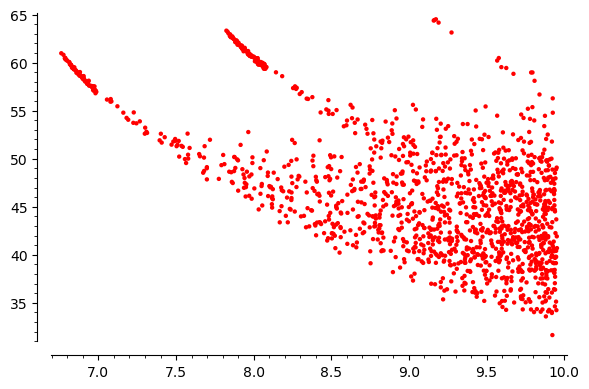

In [29]:
plotstrat